In [3]:
import pandas as pd
import numpy as np
%matplotlib 
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 8) #Make figure larger.

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [4]:
df = pd.read_csv('./北區所有＿扣掉大怪獸_英文_20160901_20170831.csv') #df for dataframe
df.head() #get a glimpse
# df.columns 

,時 間,區 域,館 舍 別,迴 路 別,用電別,用電量(單位:度)
0,2017/08,North,Tien_gia_bin,主迴路,Teach,421187.8
1,2017/08,North,SC,主迴路,Teach,322267.0
2,2017/08,North,EECS,主迴路,Teach,305416.0
3,2017/08,North,SB,主迴路,Teach,183416.0
4,2017/08,North,DinningHall2,主迴路,Rented,113984.0


In [5]:
df.describe()

,用電量(單位:度)
count,7.120000e+02
mean,9.759426e+04
std,5.452455e+05
min,0.000000e+00
25%,1.397693e+03
50%,7.258220e+03
75%,3.423864e+04
max,8.070742e+06


In [6]:
# #用pd.describe()了解資料
# #newdf 是只看時間與用電量的 資料子集
# newdf= df[['﻿時  間','用電量(單位:度)']]
# print(newdf.describe()) 
# print(newdf.shape) #How many data?


### 我們發現Max大的誇張，應該有統計錯誤

In [7]:
df1 = df #在df1實驗，不會搞雜原來的資料集
df1.head()
df1[df1['用電量(單位:度)'] > 100000000] #找出過大的資料

,時 間,區 域,館 舍 別,迴 路 別,用電別,用電量(單位:度)


In [8]:
df2 = df1
df2.shape

(712, 6)

In [9]:
#df1 = df1.drop(df1.index[[675,677]]) #把676,678拿掉
df2 = df[df1['用電量(單位:度)'] < 10000000] #把太大的拿掉

#df2[df2['用電量(單位:度)'] > 100000000]
df2.describe() 

,用電量(單位:度)
count,7.120000e+02
mean,9.759426e+04
std,5.452455e+05
min,0.000000e+00
25%,1.397693e+03
50%,7.258220e+03
75%,3.423864e+04
max,8.070742e+06


In [10]:
df2.shape

(712, 6)

In [11]:
df2 = df2[df2['用電量(單位:度)'] > 10]
print (df2.shape)
print (718-682, ": number of rows that are 0")

(676, 6)
36 : number of rows that are 0


In [12]:
df2.describe()

,用電量(單位:度)
count,6.760000e+02
mean,1.027916e+05
std,5.591183e+05
min,2.850000e+01
25%,1.759880e+03
50%,9.797685e+03
75%,3.664763e+04
max,8.070742e+06


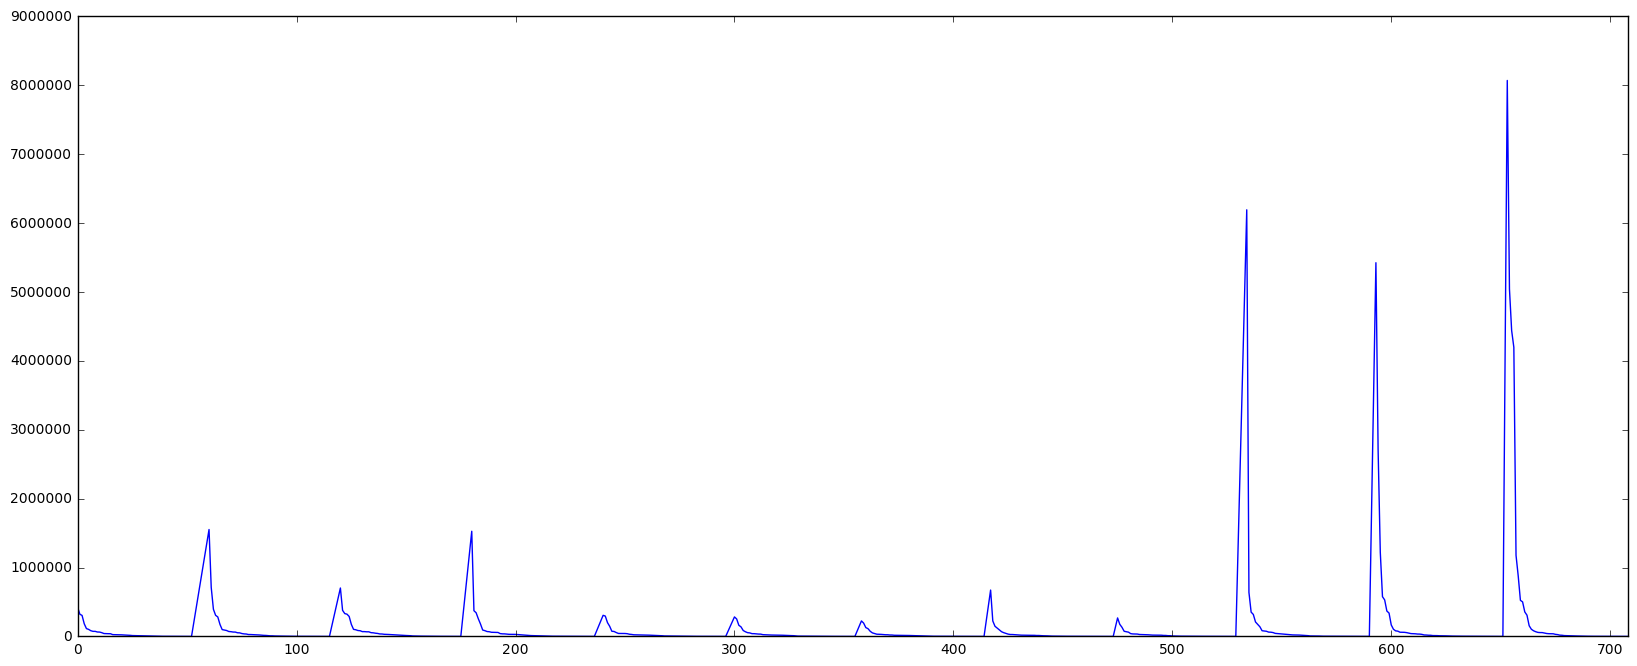

In [13]:
df2['用電量(單位:度)'].plot.line()
#matplotlib.pyplot.title('Electricity usage per 15 min (In 2 weeks, unit: degree)')

In [14]:
df3 = df2
df3.columns
df3.describe()

,用電量(單位:度)
count,6.760000e+02
mean,1.027916e+05
std,5.591183e+05
min,2.850000e+01
25%,1.759880e+03
50%,9.797685e+03
75%,3.664763e+04
max,8.070742e+06


In [15]:
df3 = df3.rename(index=str, columns={'時  間':"date",'用電量(單位:度)':"Usage",'迴 路 別':'loop','用電別':'types,','區 域':'area','館 舍 別':'bd_name'}) 
df3.columns

Index(['date', 'area', 'bd_name', 'loop', 'types,', 'Usage'], dtype='object')

In [16]:
df3.groupby(['date']).count()['Usage']

date
2016/09    56
2016/10    59
2016/11    57
2016/12    55
2017/01    57
2017/02    57
2017/03    56
2017/04    57
2017/05    57
2017/06    56
2017/07    56
2017/08    53
Name: Usage, dtype: int64

In [17]:
#df3.groupby(['date','bd_name']).plot(subplots=True)

In [26]:
df4 = df3
df4 = df3[d]

array(['2017/08', '2017/07', '2017/06', '2017/05', '2017/04', '2017/03',
       '2017/02', '2017/01', '2016/12', '2016/11', '2016/10', '2016/09'], dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x119d27160>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11a83d8d0>], dtype=object)

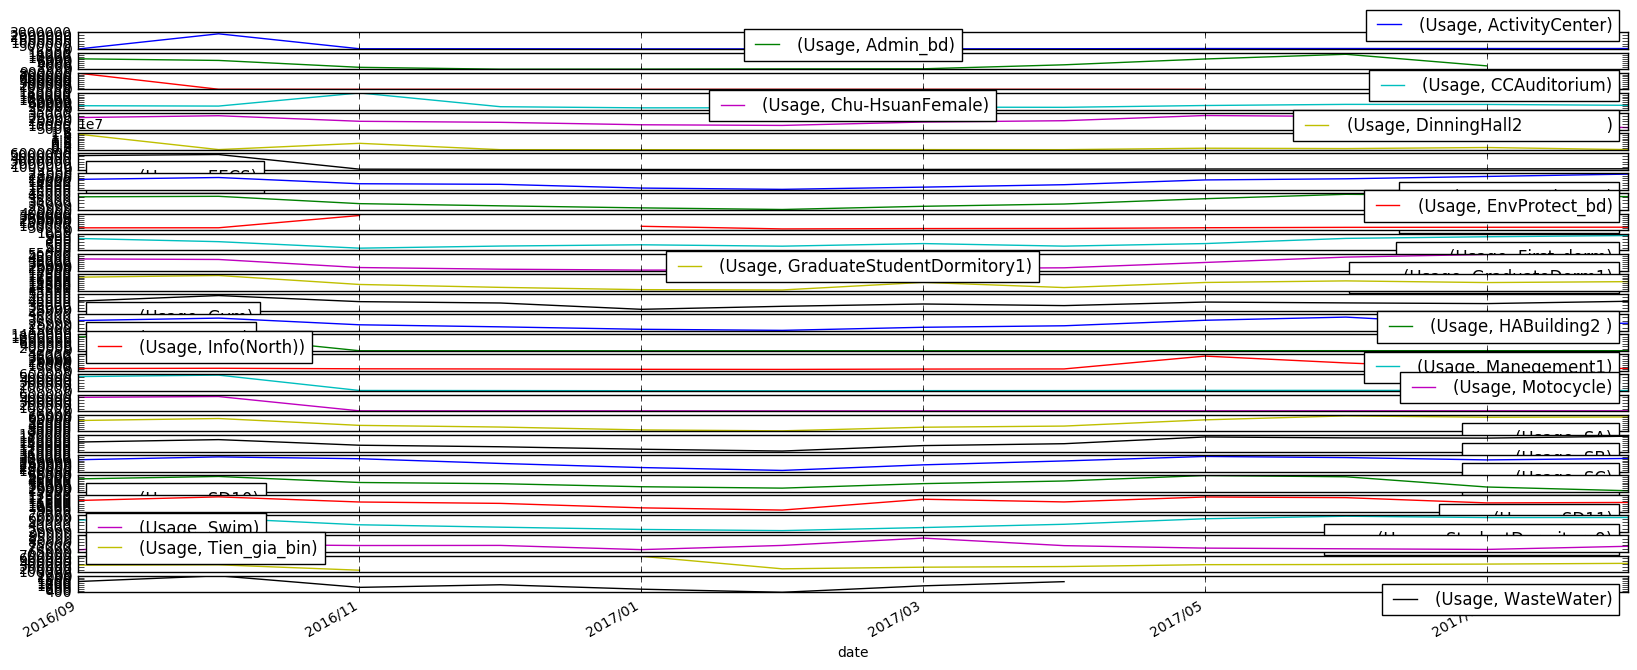

In [22]:
df3.groupby(['date','bd_name']).sum().unstack().plot(subplots=True)



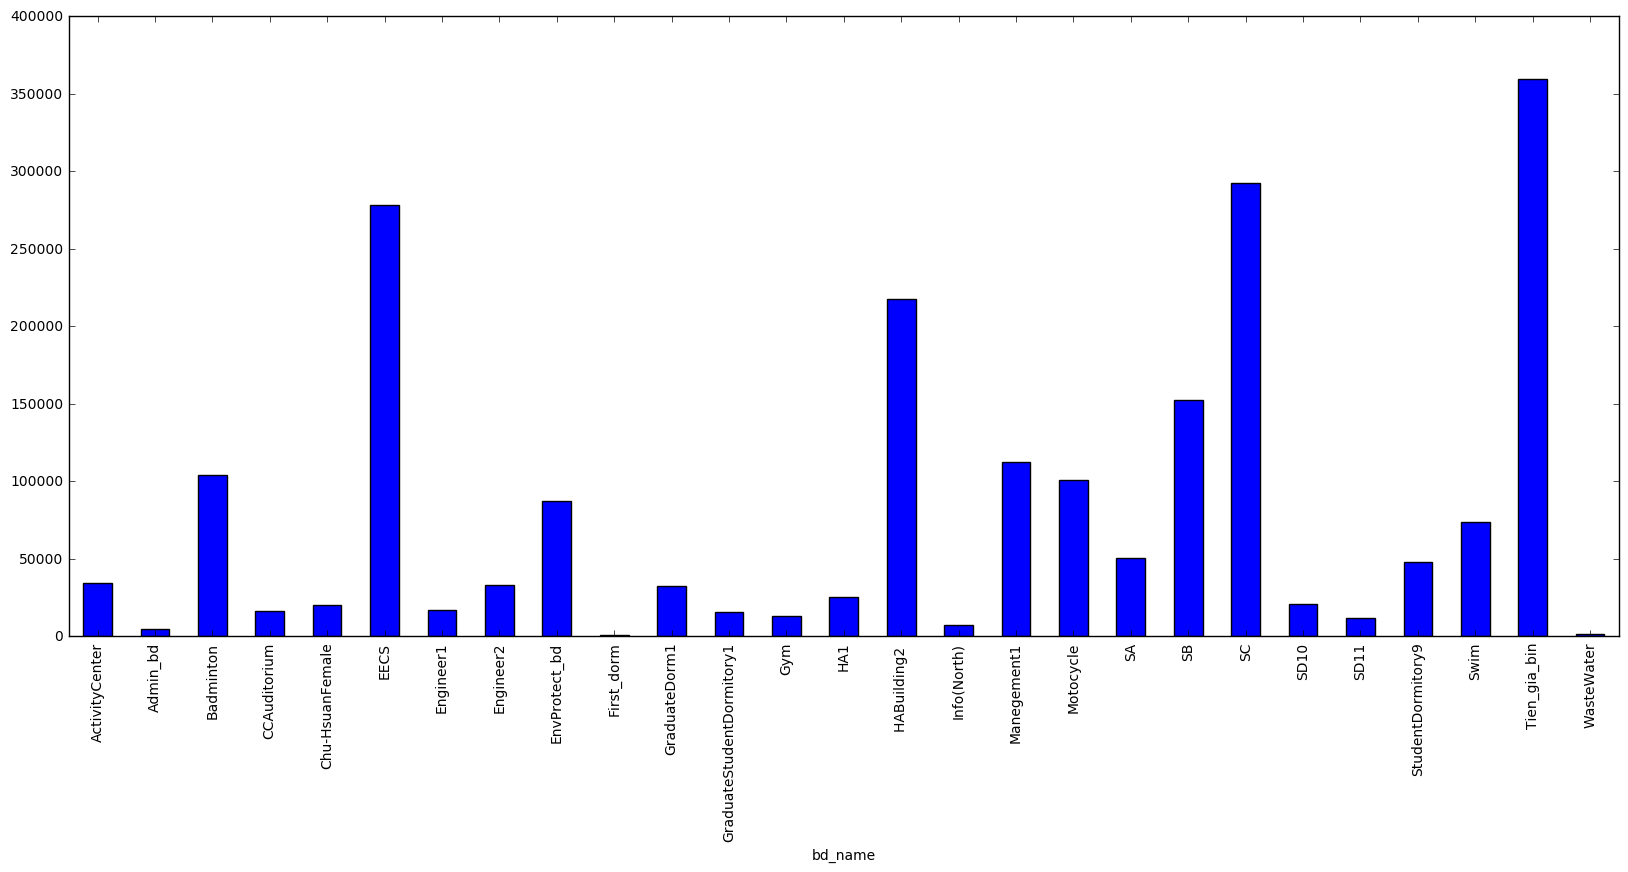

In [297]:
dfsmall = df3 [df3.bd_name != 'DinningHall2                ']
dfsmallmean = dfsmall.groupby('bd_name').mean()
dfsmallmean.Usage.plot.bar()
df3_1 = df3.groupby('bd_name').mean()
#.Usage.plot.bar()

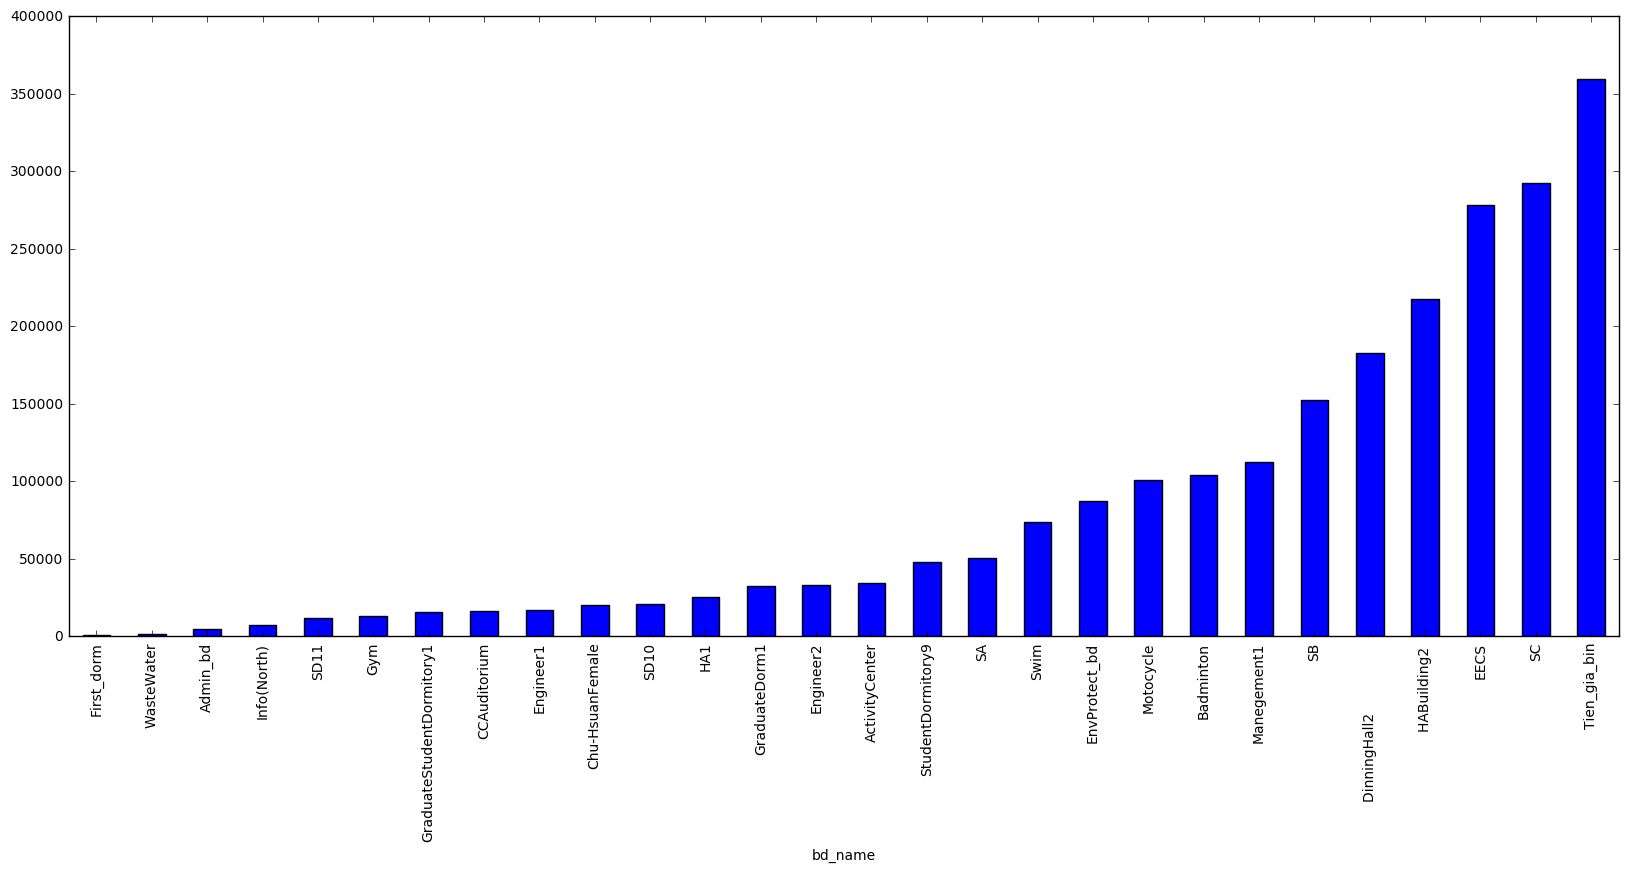

In [298]:
df3_1.sort_values('Usage')['Usage'].plot.bar()
savefig('sort.png')

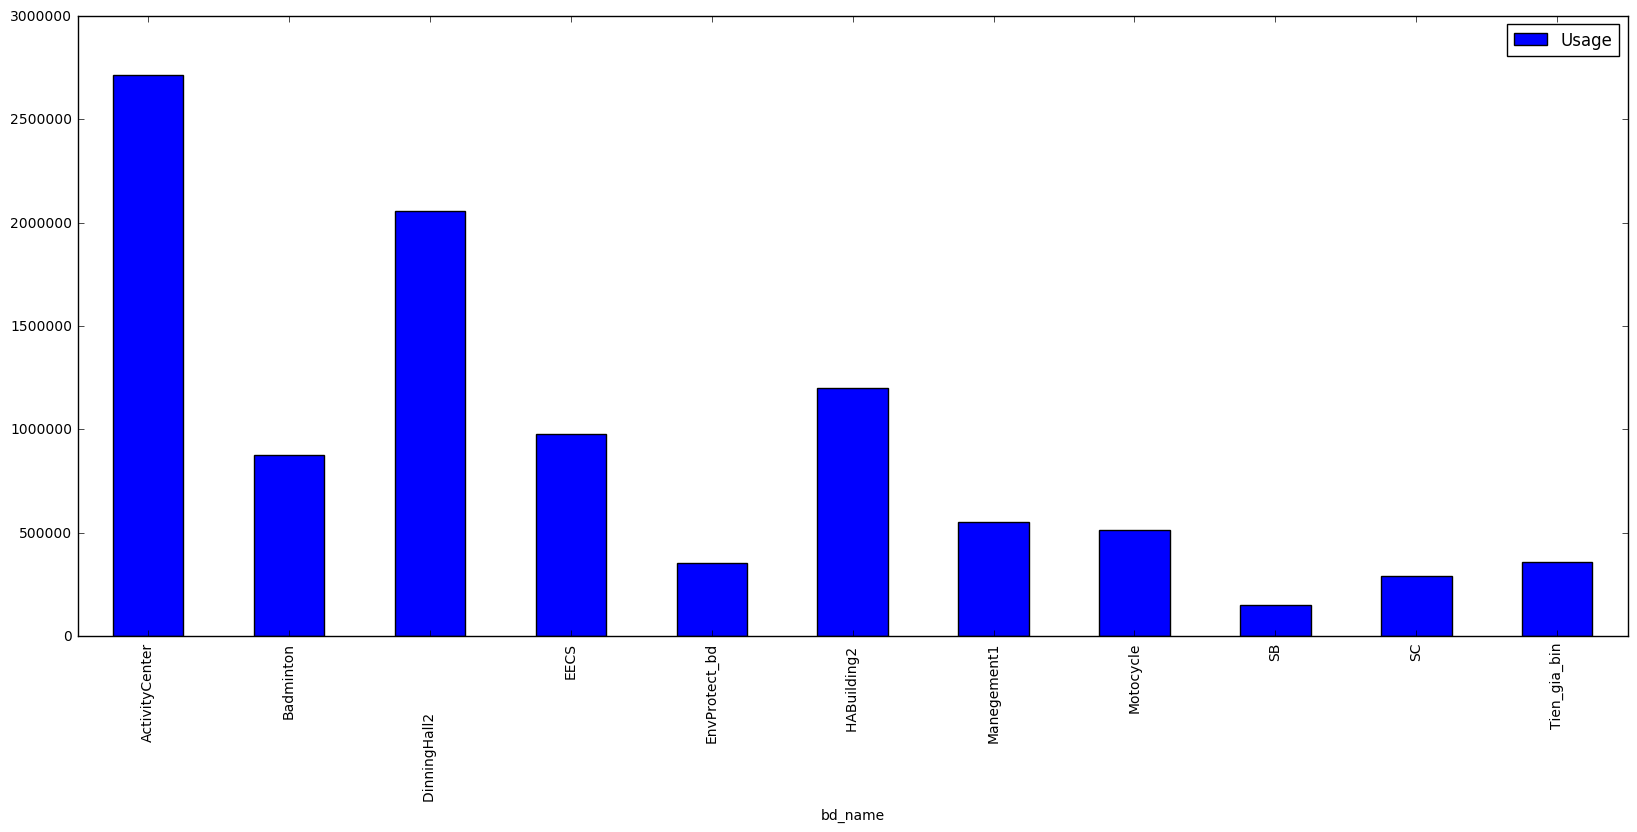

In [305]:
#df3.groupby(['date','bd_name']).count()['Usage'].unstack().plot()
df3big = df3[df3.Usage > 100000]
df3big.groupby('bd_name').mean().plot.bar()

/Users/ah-bau/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


bd_name
ActivityCenter                  Axes(0.125,0.125;0.775x0.775)
Admin_bd                        Axes(0.125,0.125;0.775x0.775)
Badminton                       Axes(0.125,0.125;0.775x0.775)
CCAuditorium                    Axes(0.125,0.125;0.775x0.775)
Chu-HsuanFemale                 Axes(0.125,0.125;0.775x0.775)
DinningHall2                    Axes(0.125,0.125;0.775x0.775)
EECS                            Axes(0.125,0.125;0.775x0.775)
Engineer1                       Axes(0.125,0.125;0.775x0.775)
Engineer2                       Axes(0.125,0.125;0.775x0.775)
EnvProtect_bd                   Axes(0.125,0.125;0.775x0.775)
First_dorm                      Axes(0.125,0.125;0.775x0.775)
GraduateDorm1                   Axes(0.125,0.125;0.775x0.775)
GraduateStudentDormitory1       Axes(0.125,0.125;0.775x0.775)
Gym                             Axes(0.125,0.125;0.775x0.775)
HA1                             Axes(0.125,0.125;0.775x0.775)
HABuilding2                     Axes(0.125,0.125;0.775x0.775)


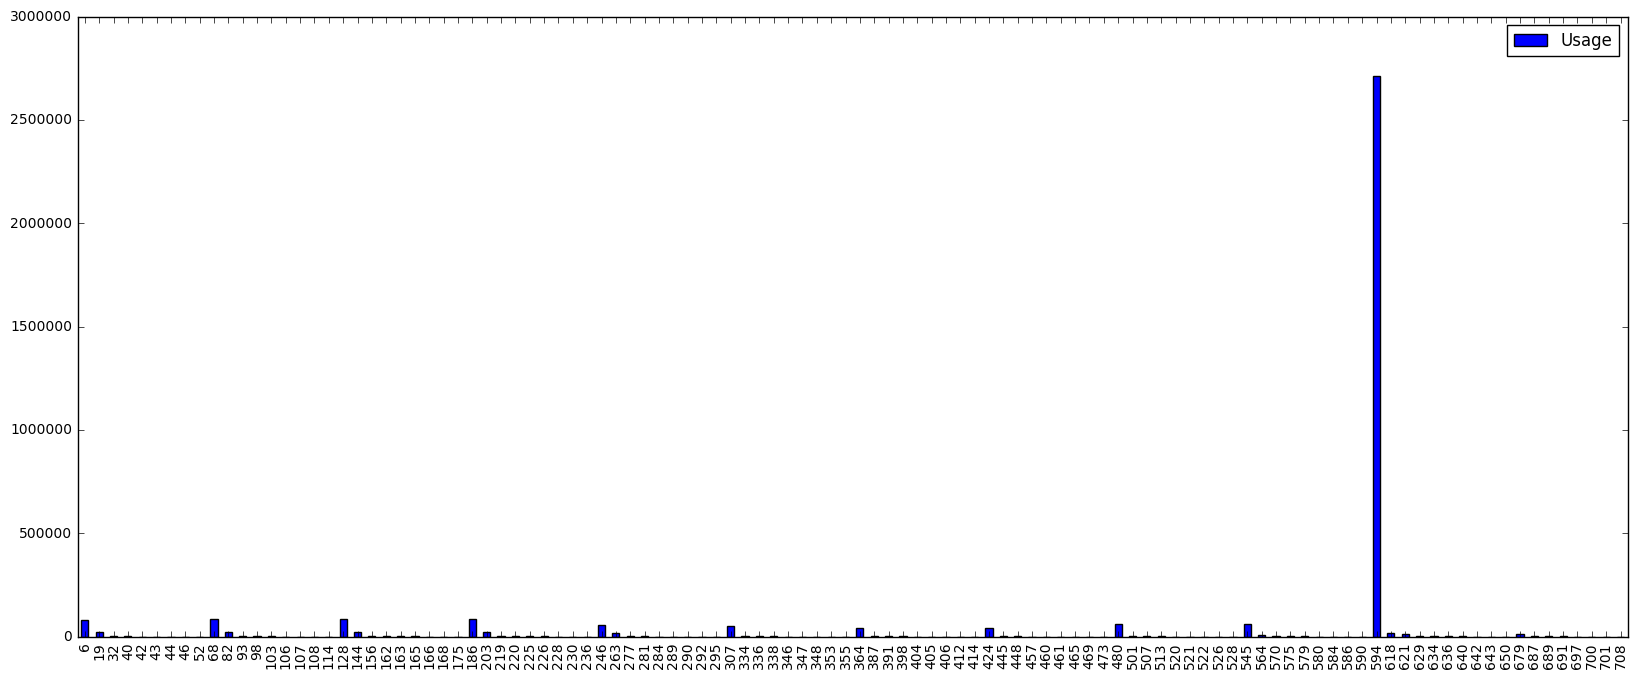

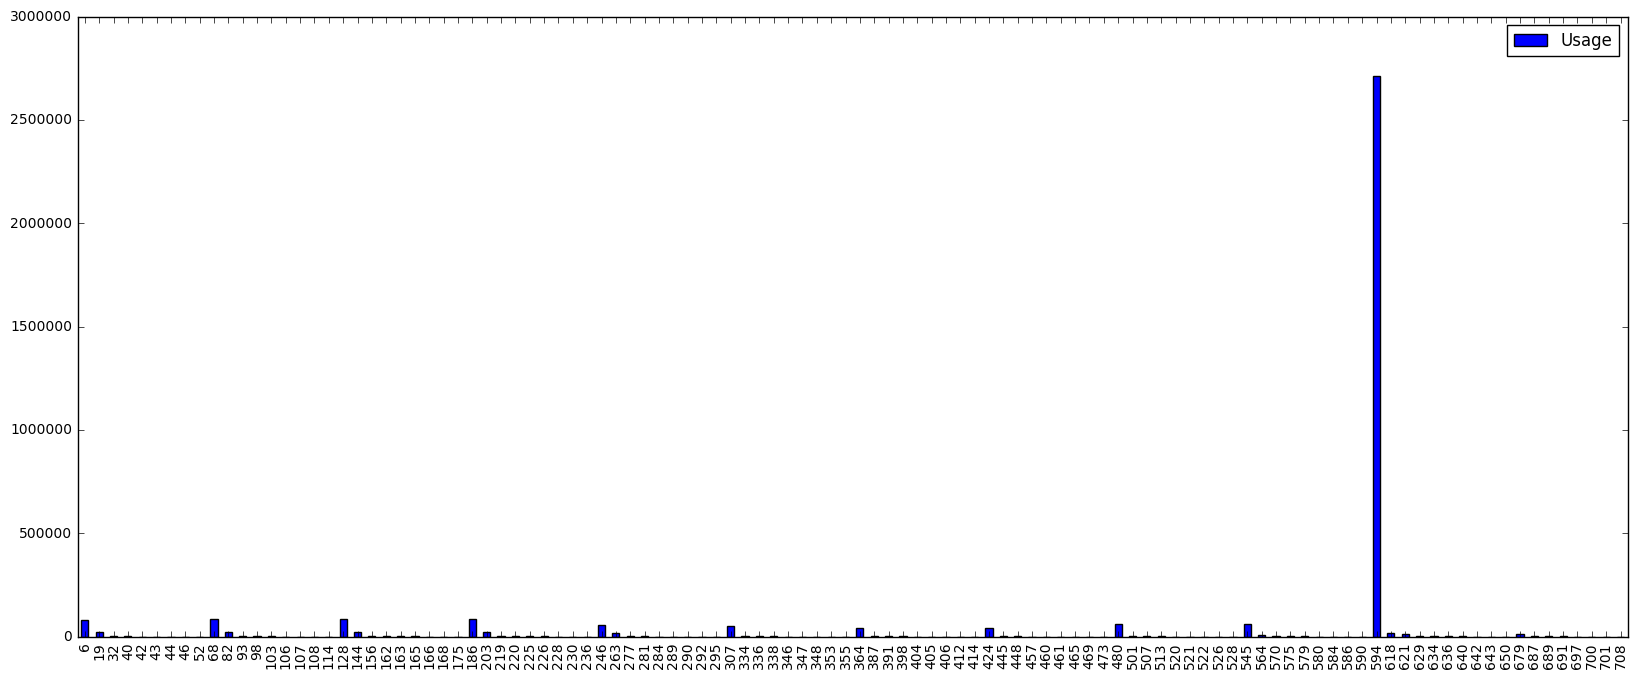

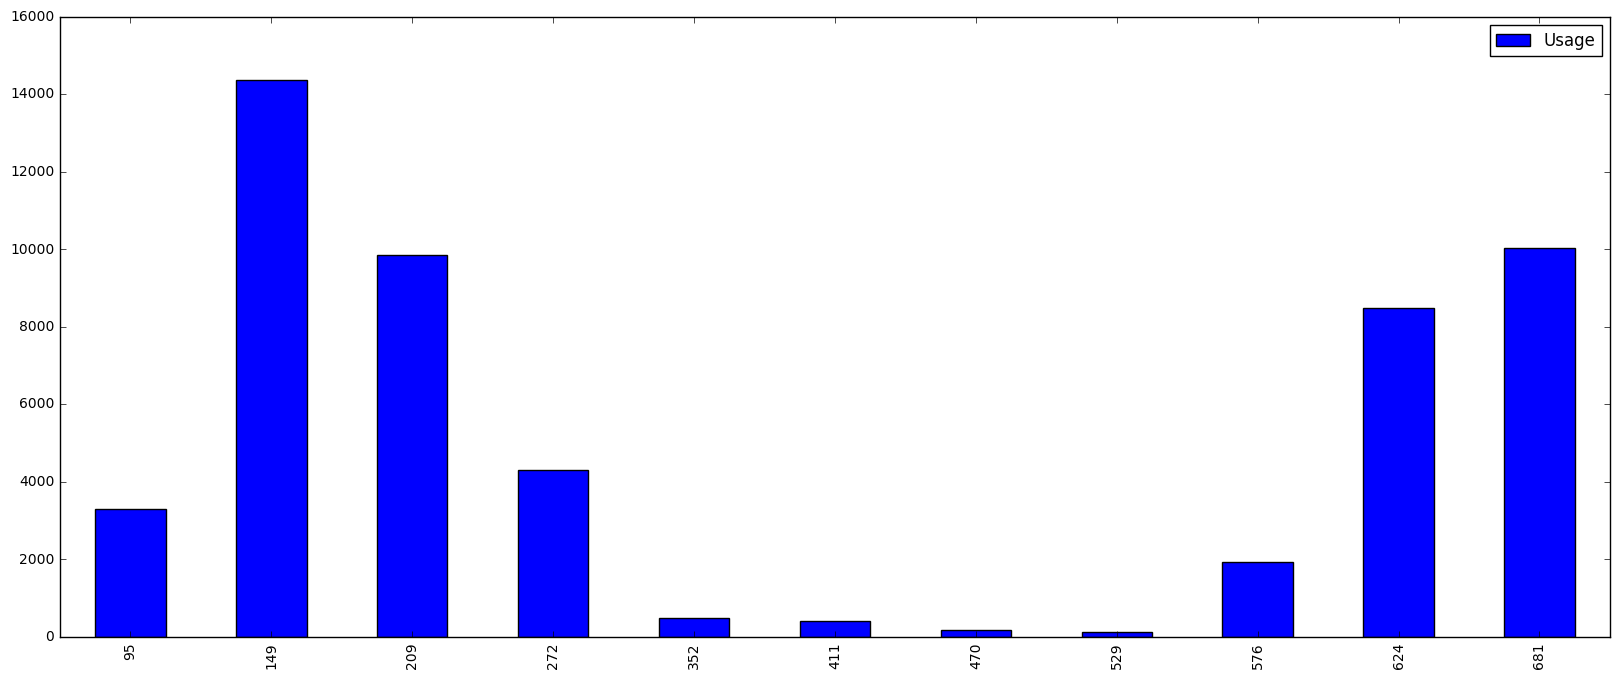

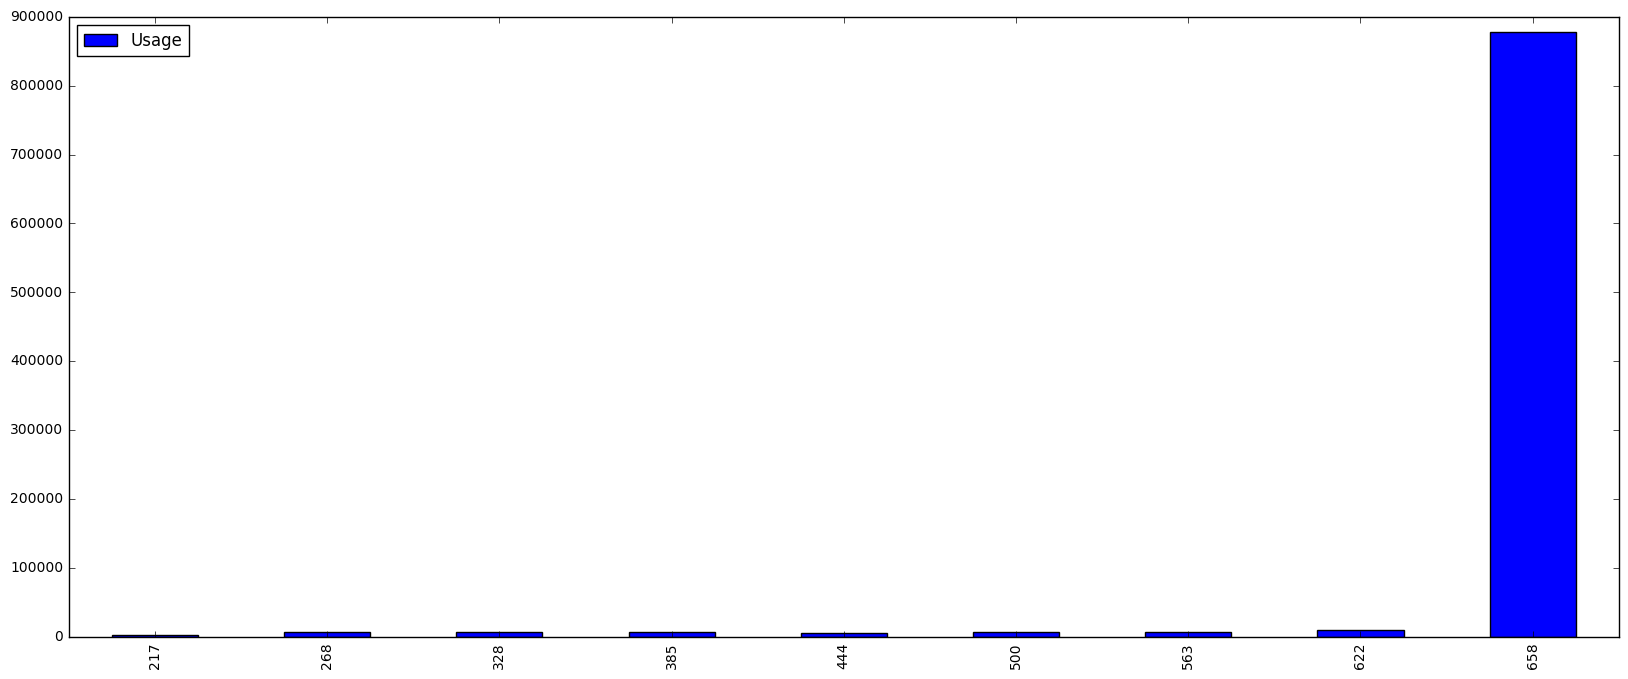

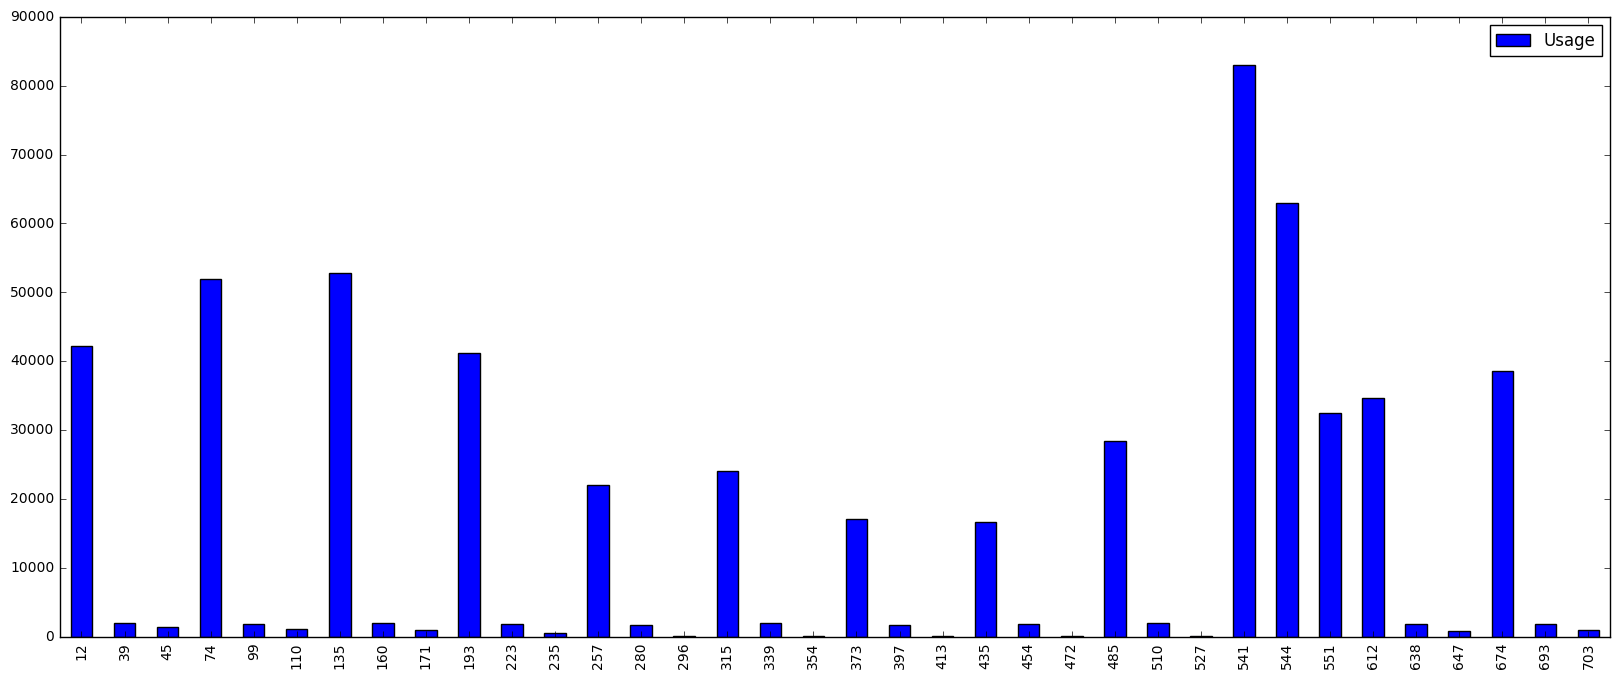

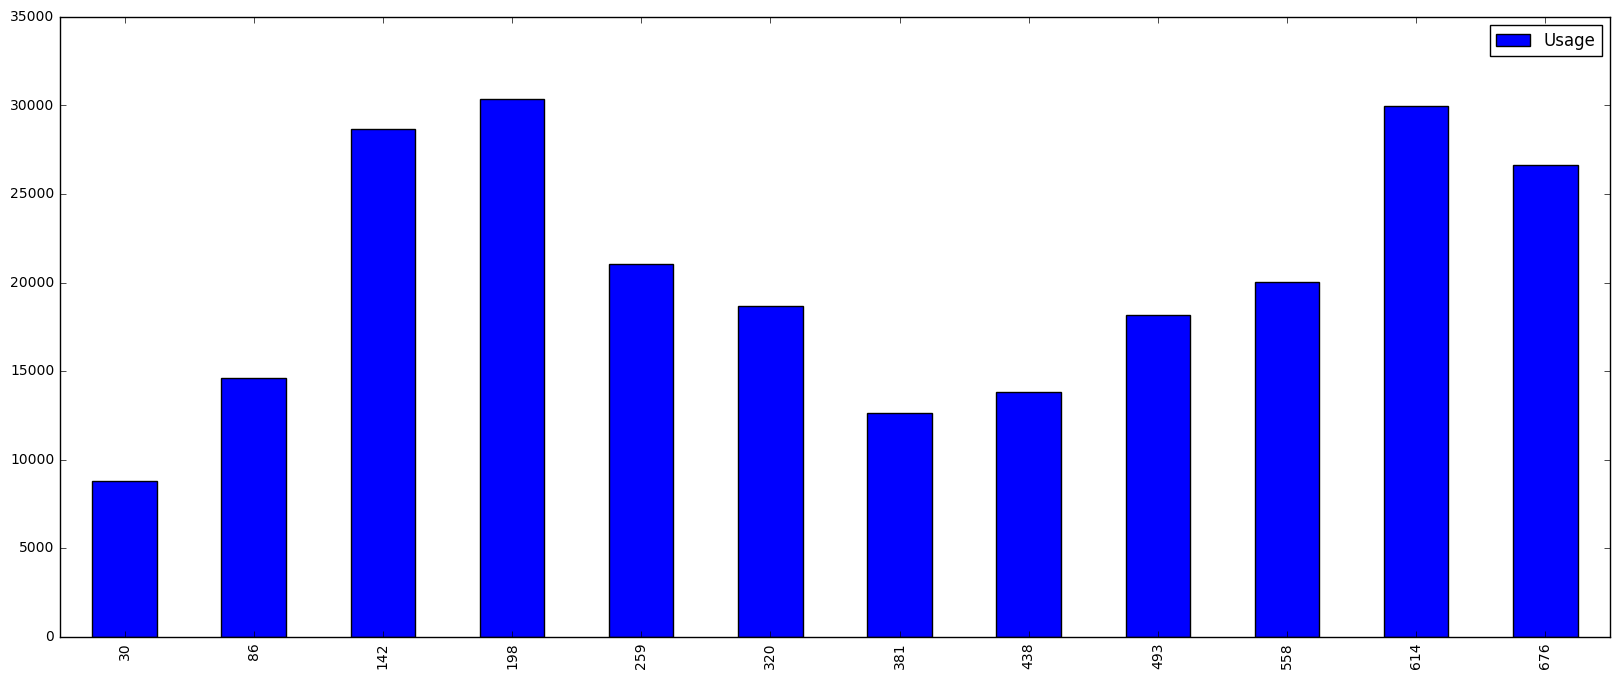

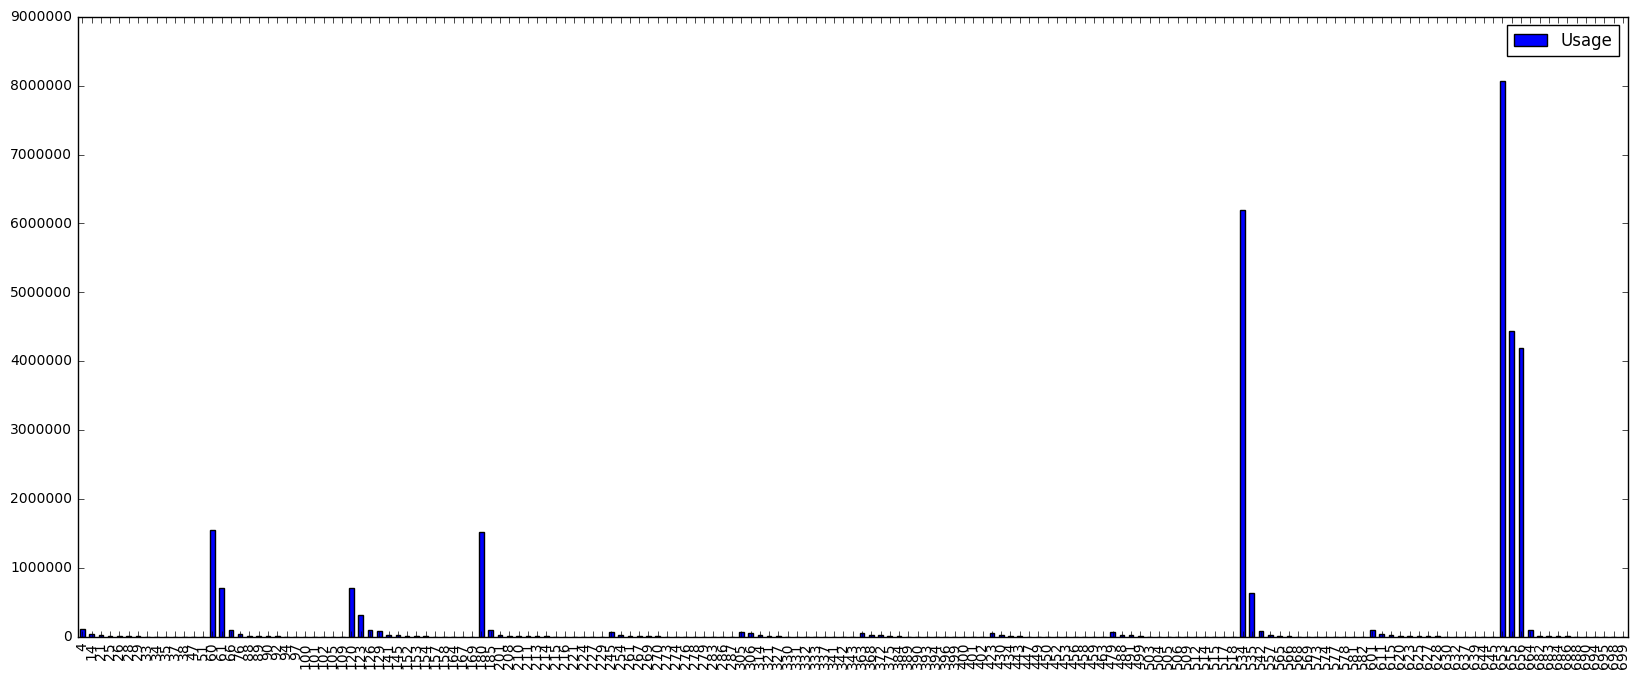

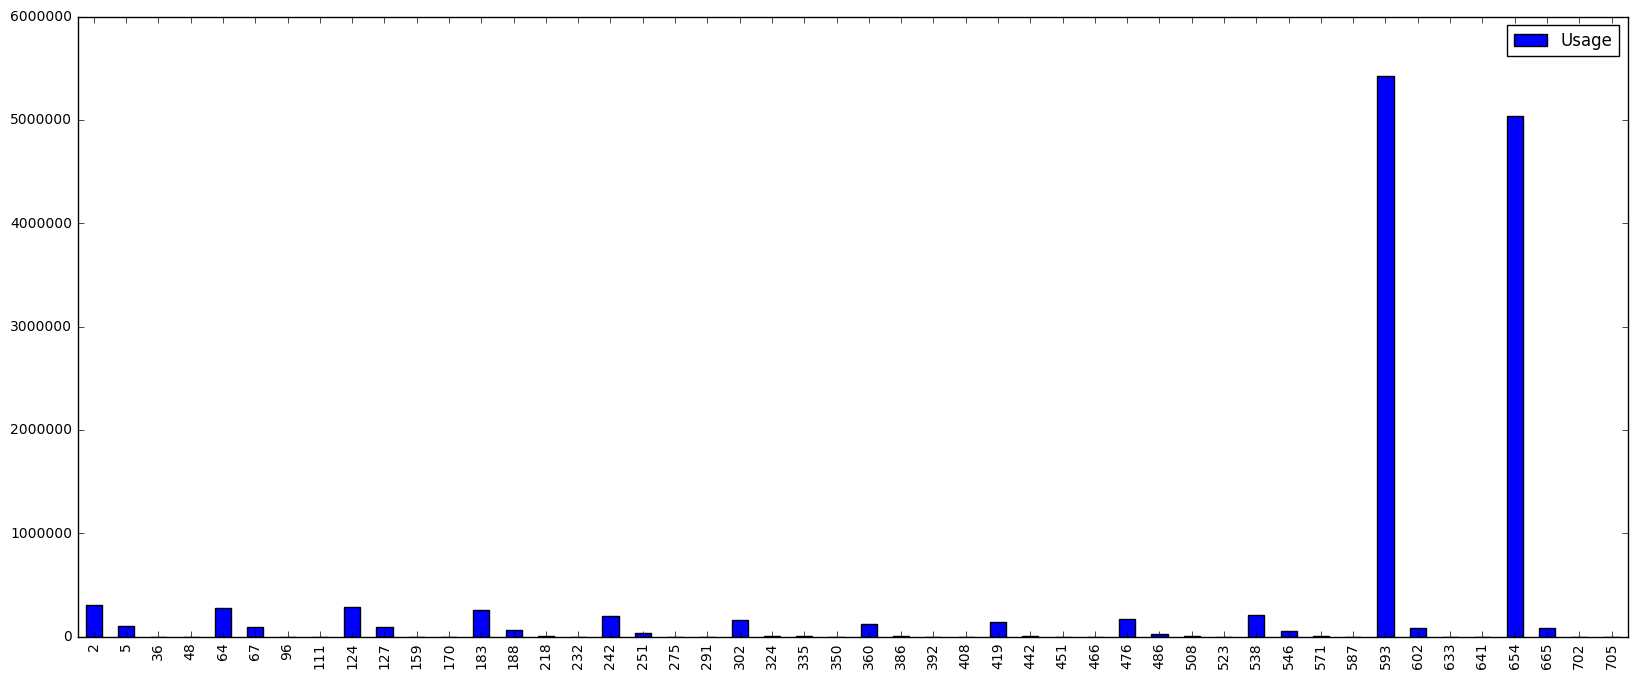

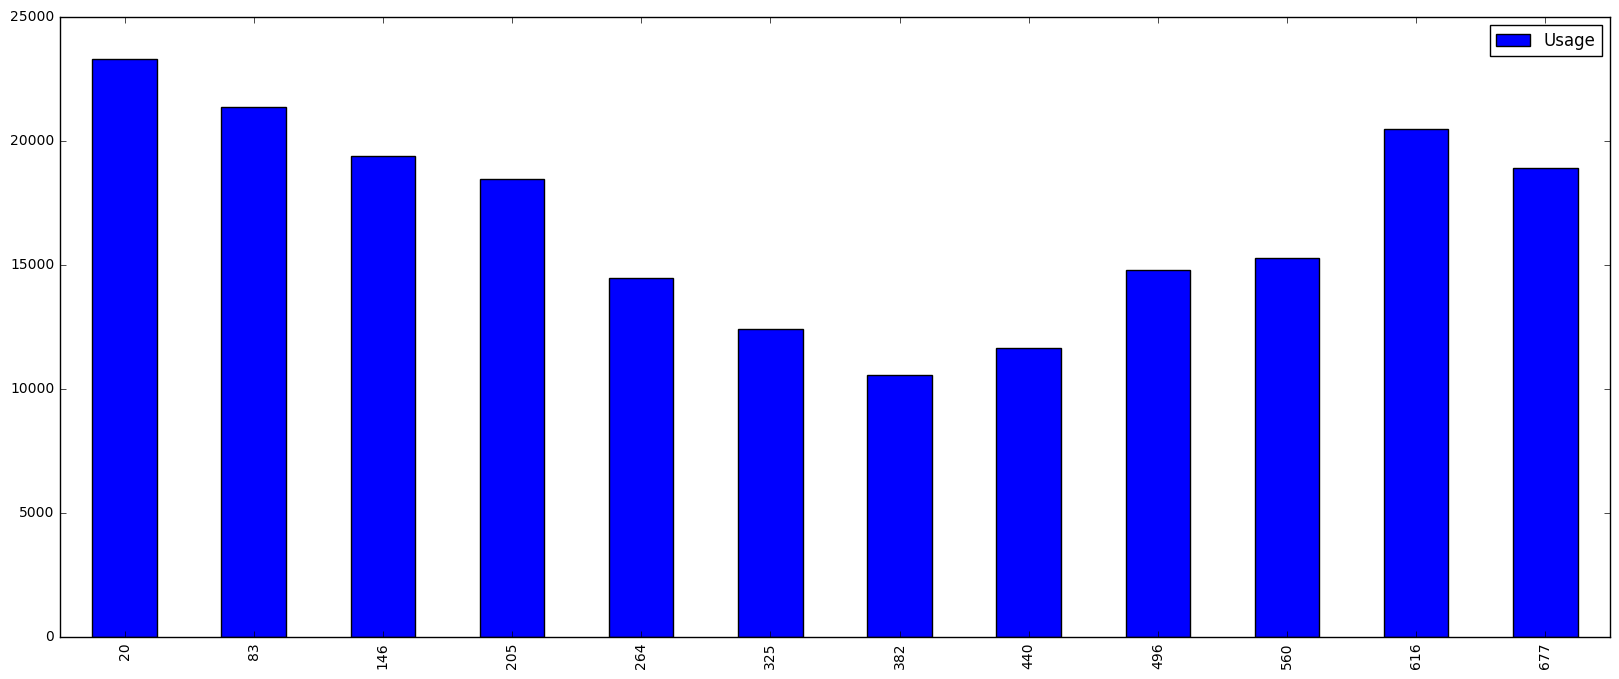

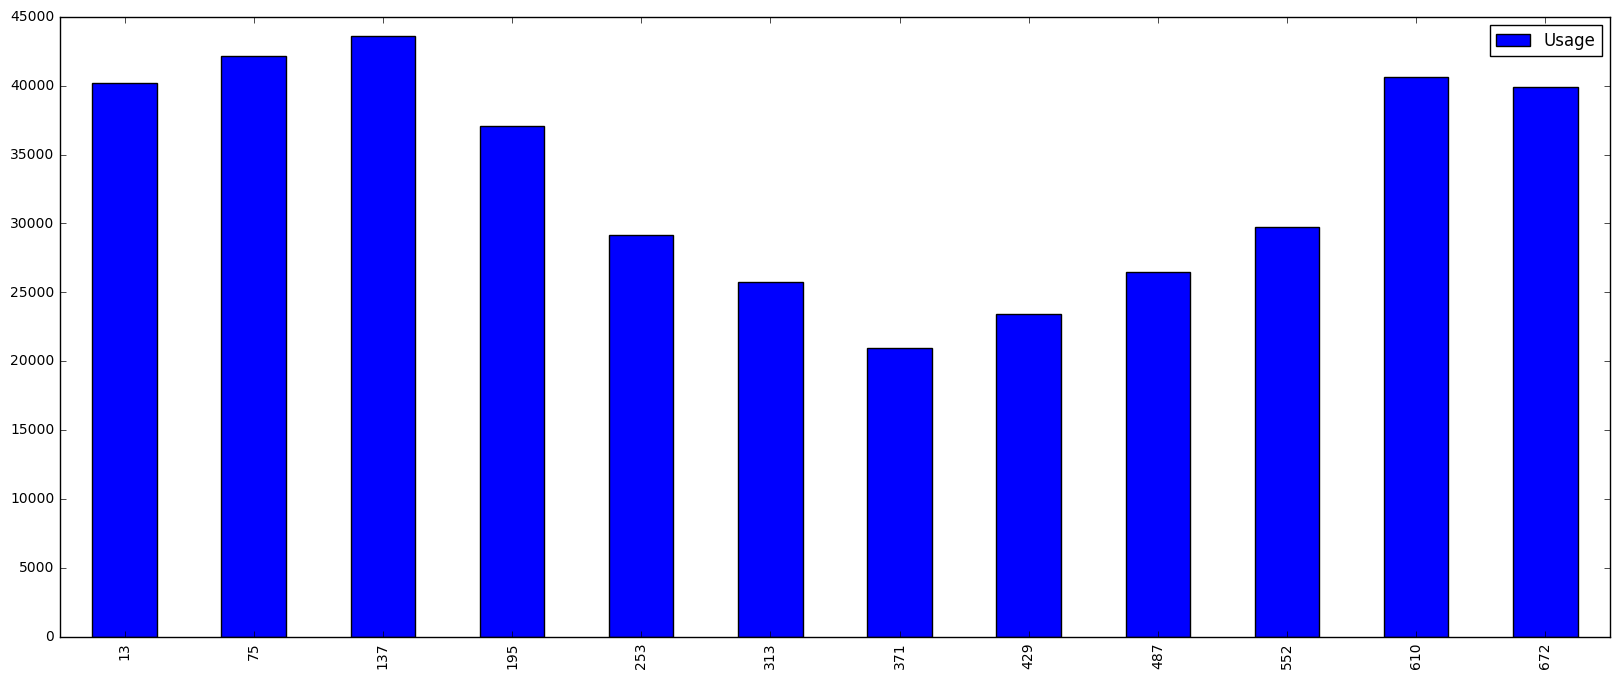

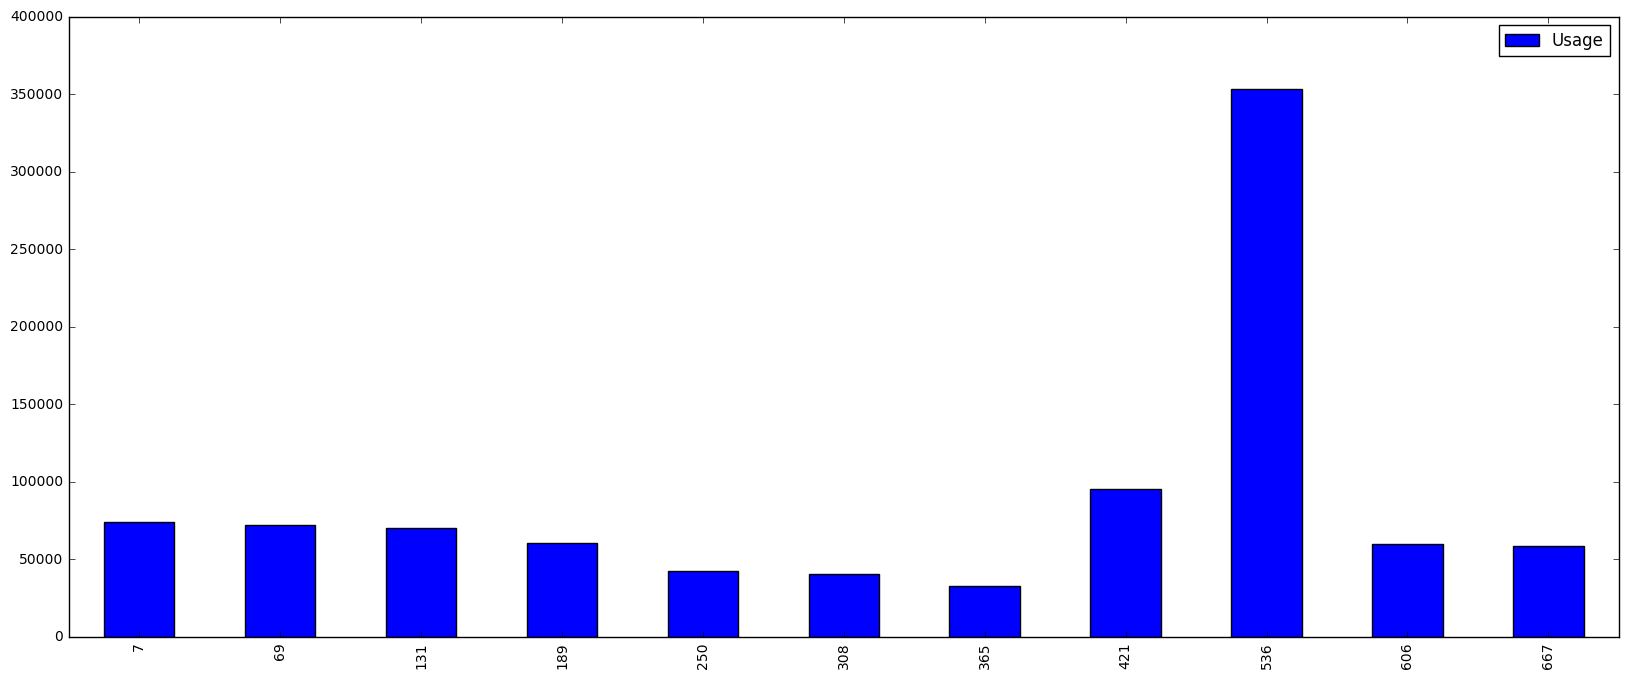

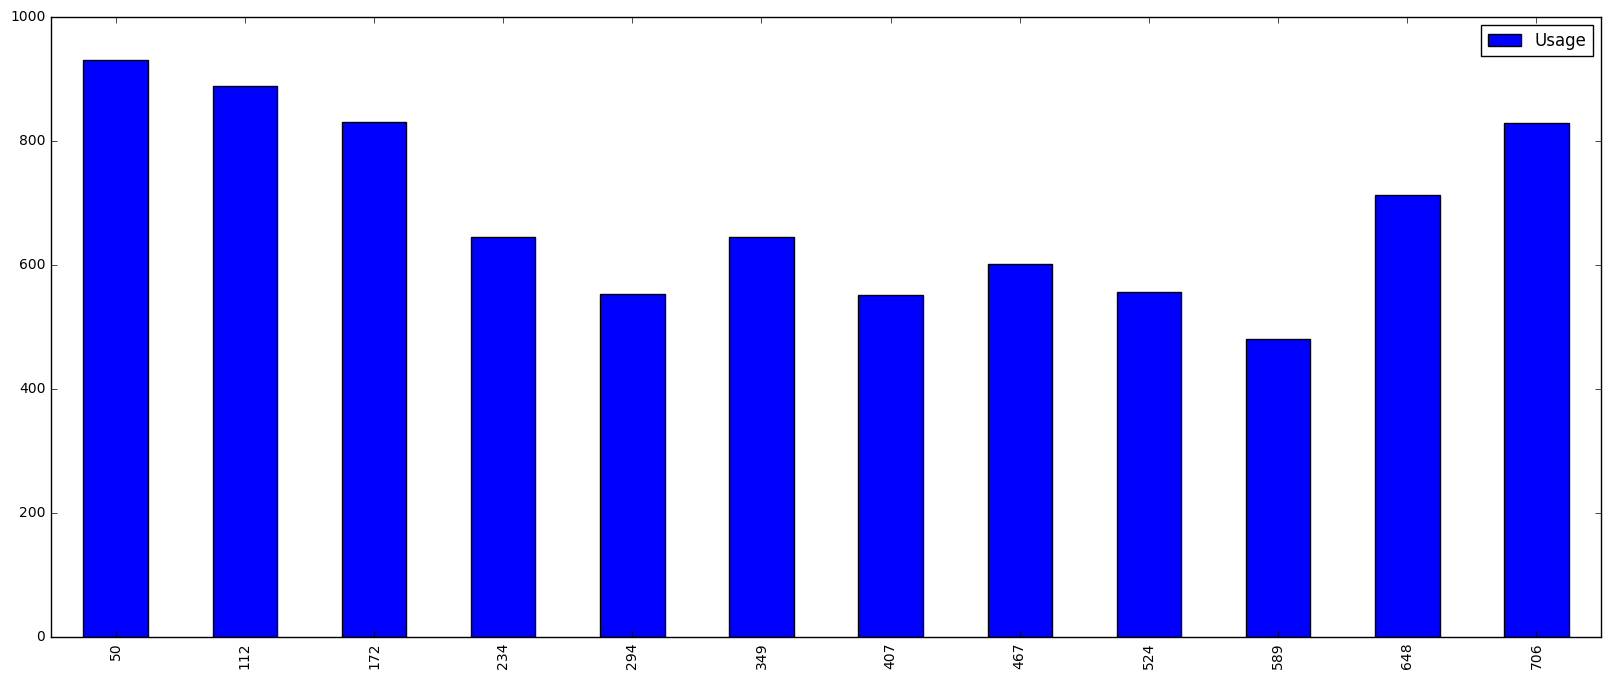

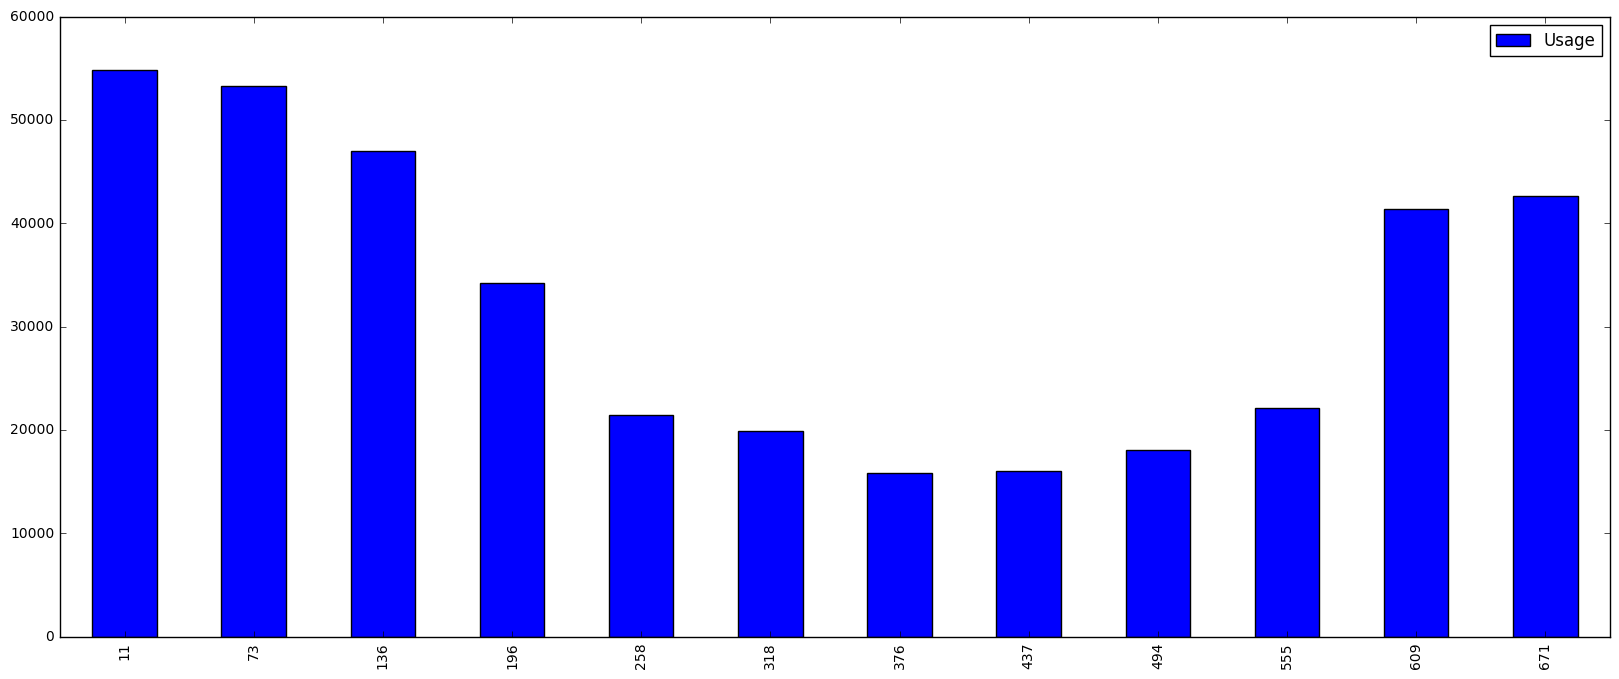

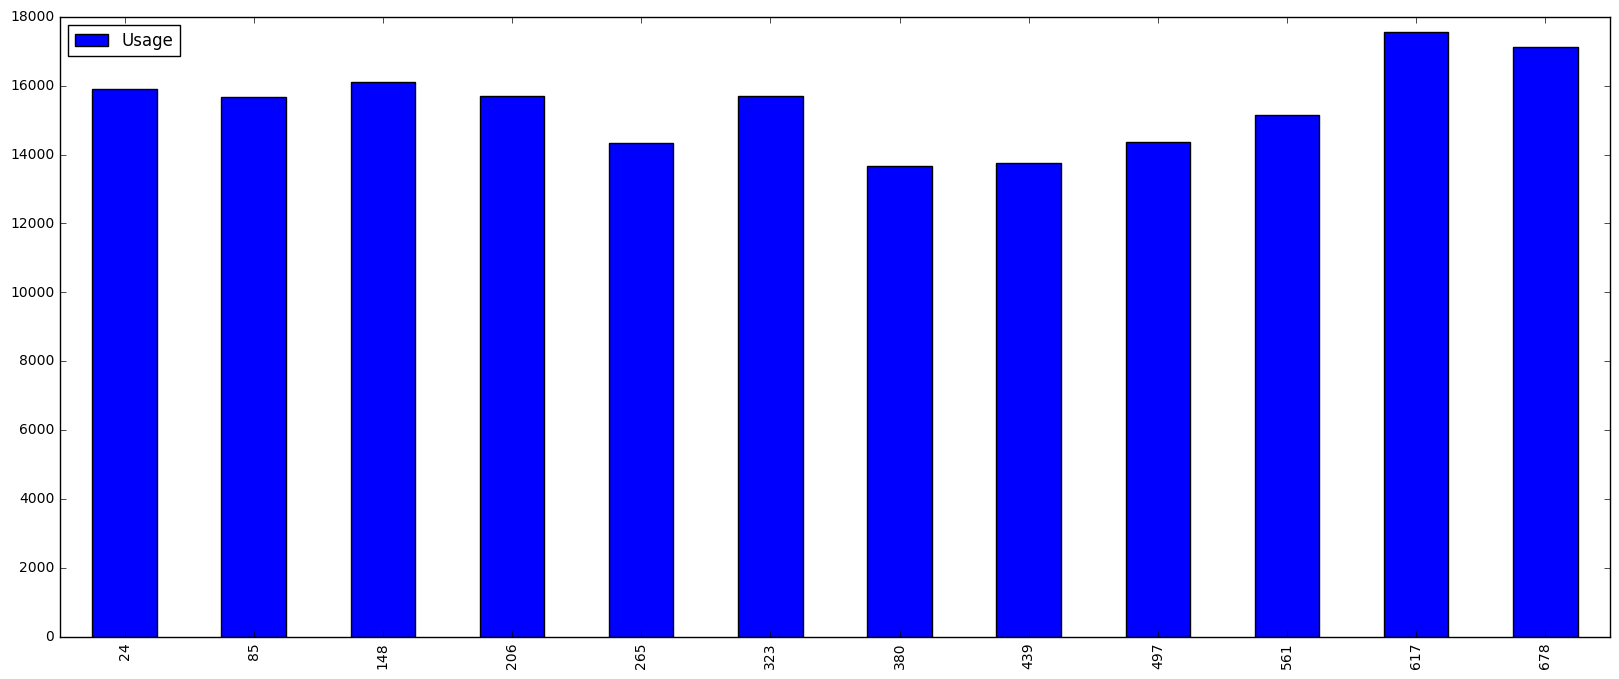

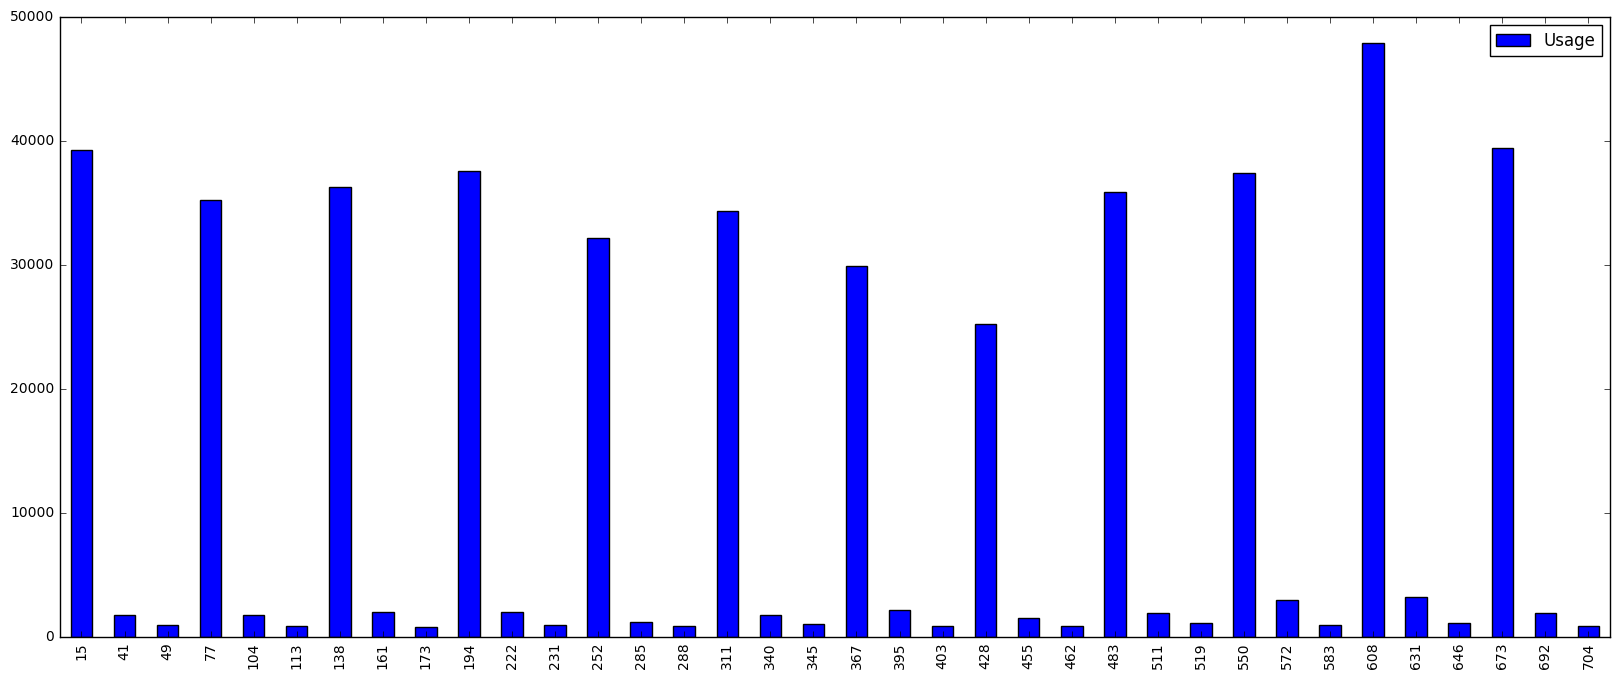

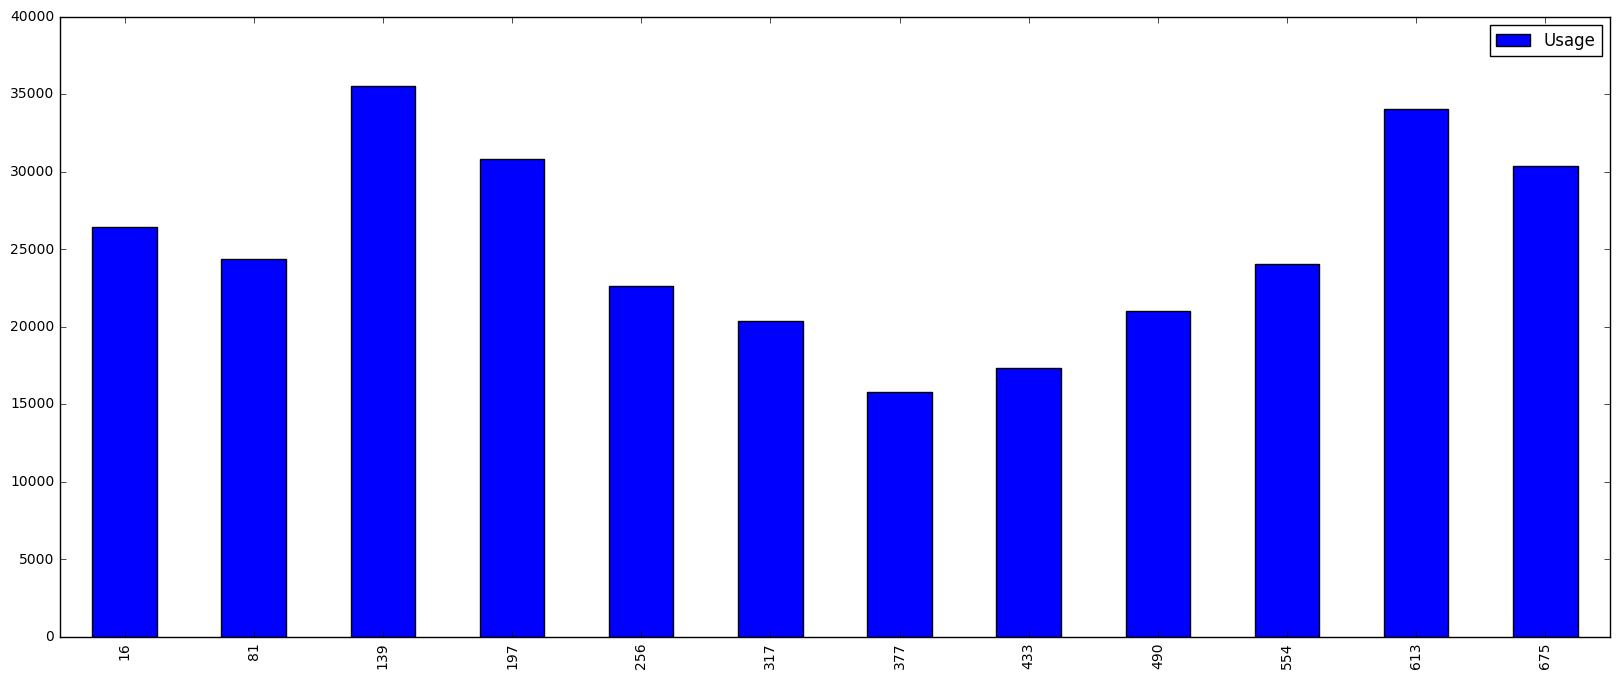

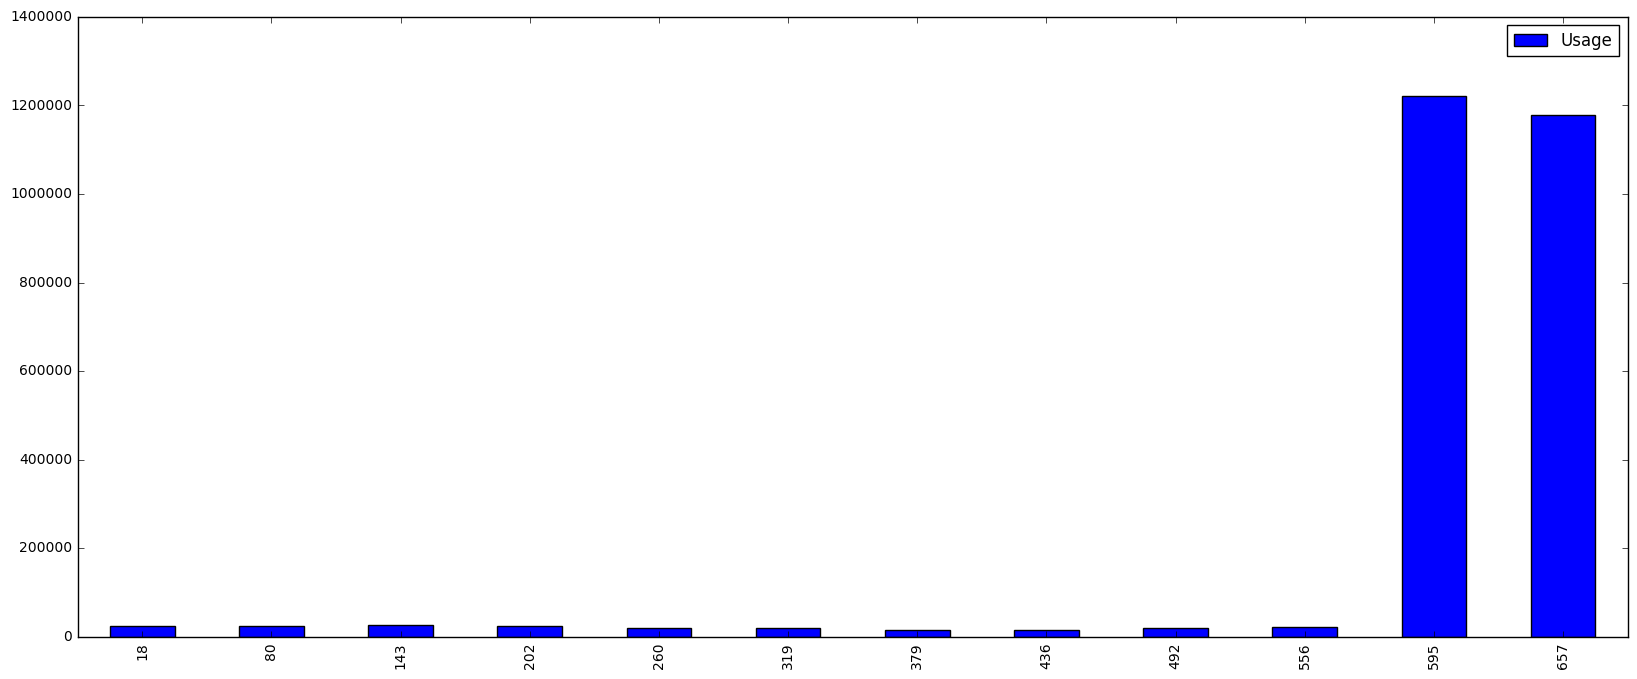

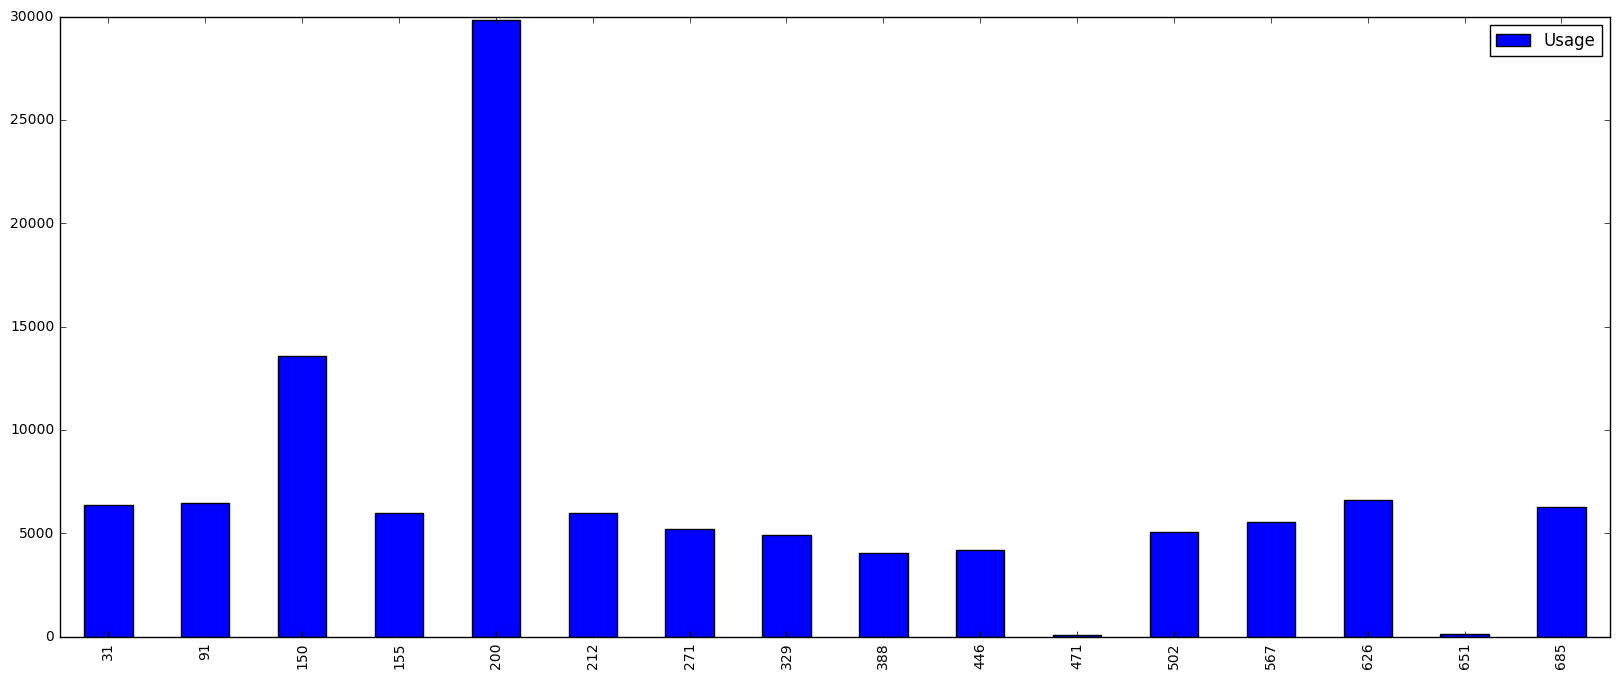

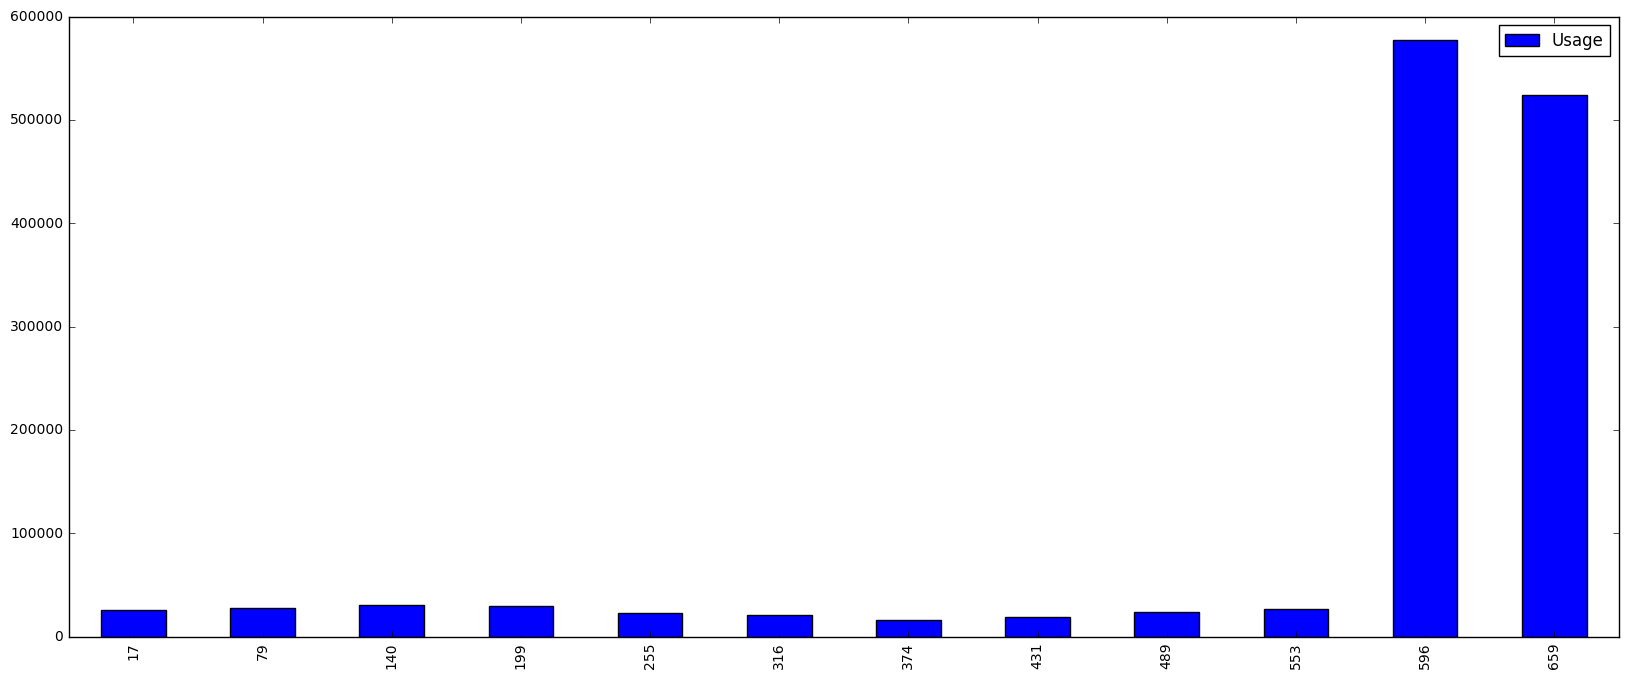

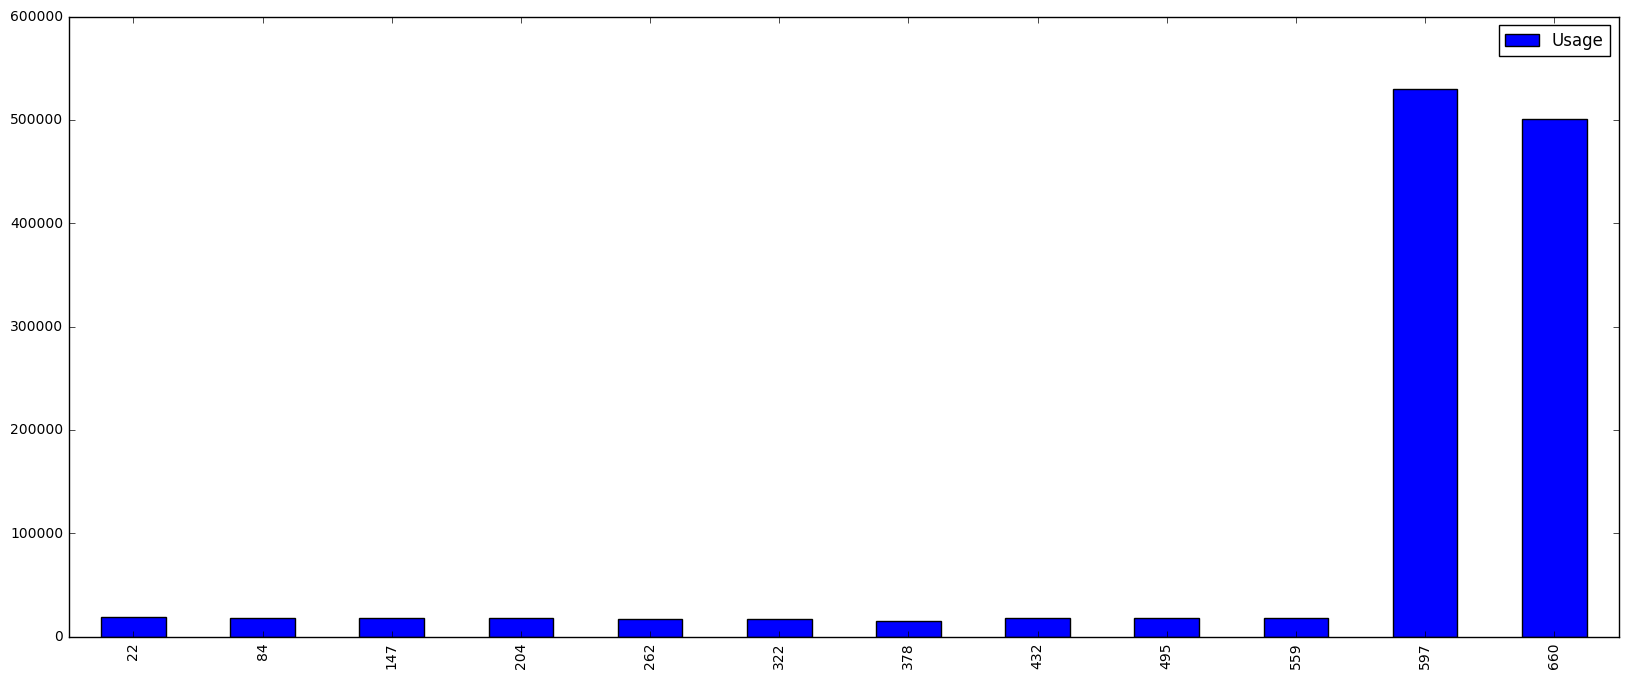

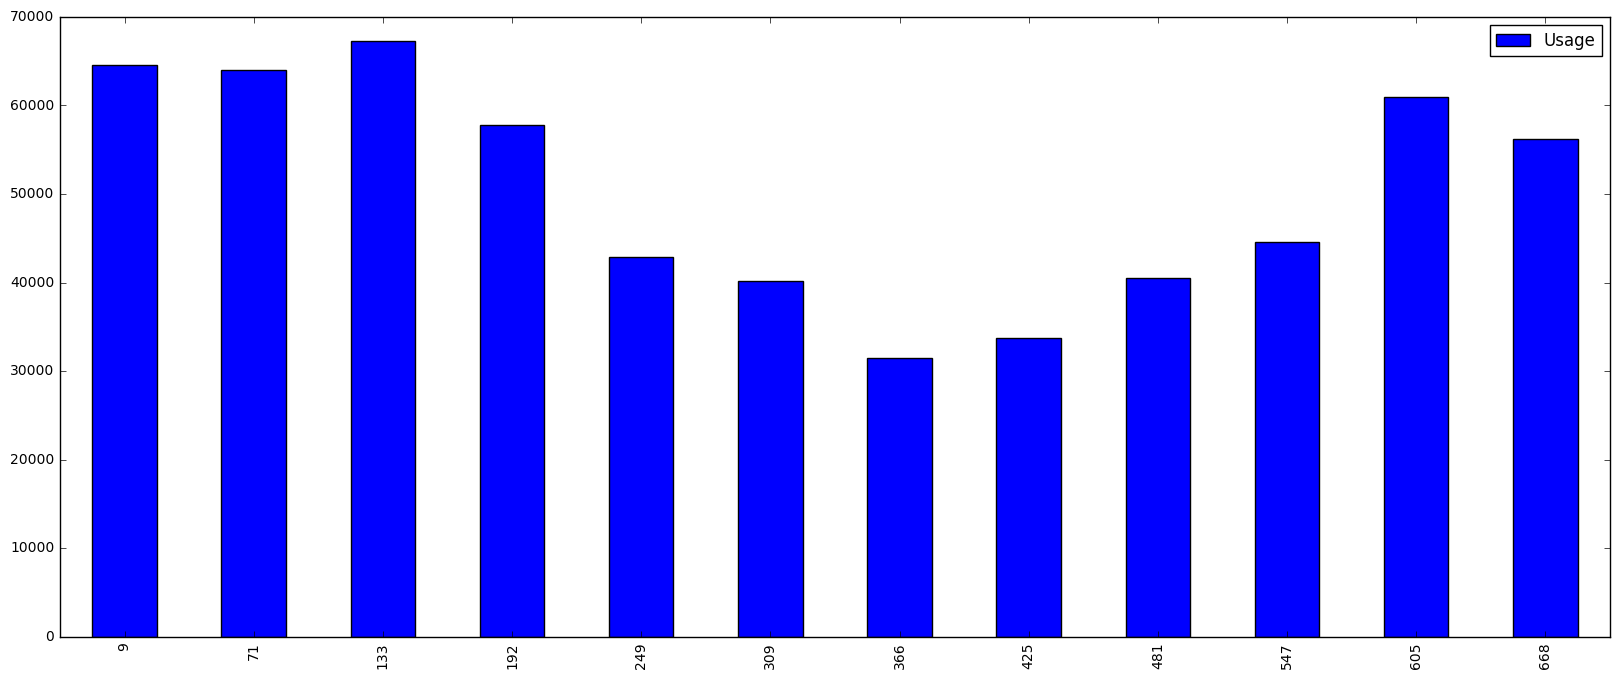

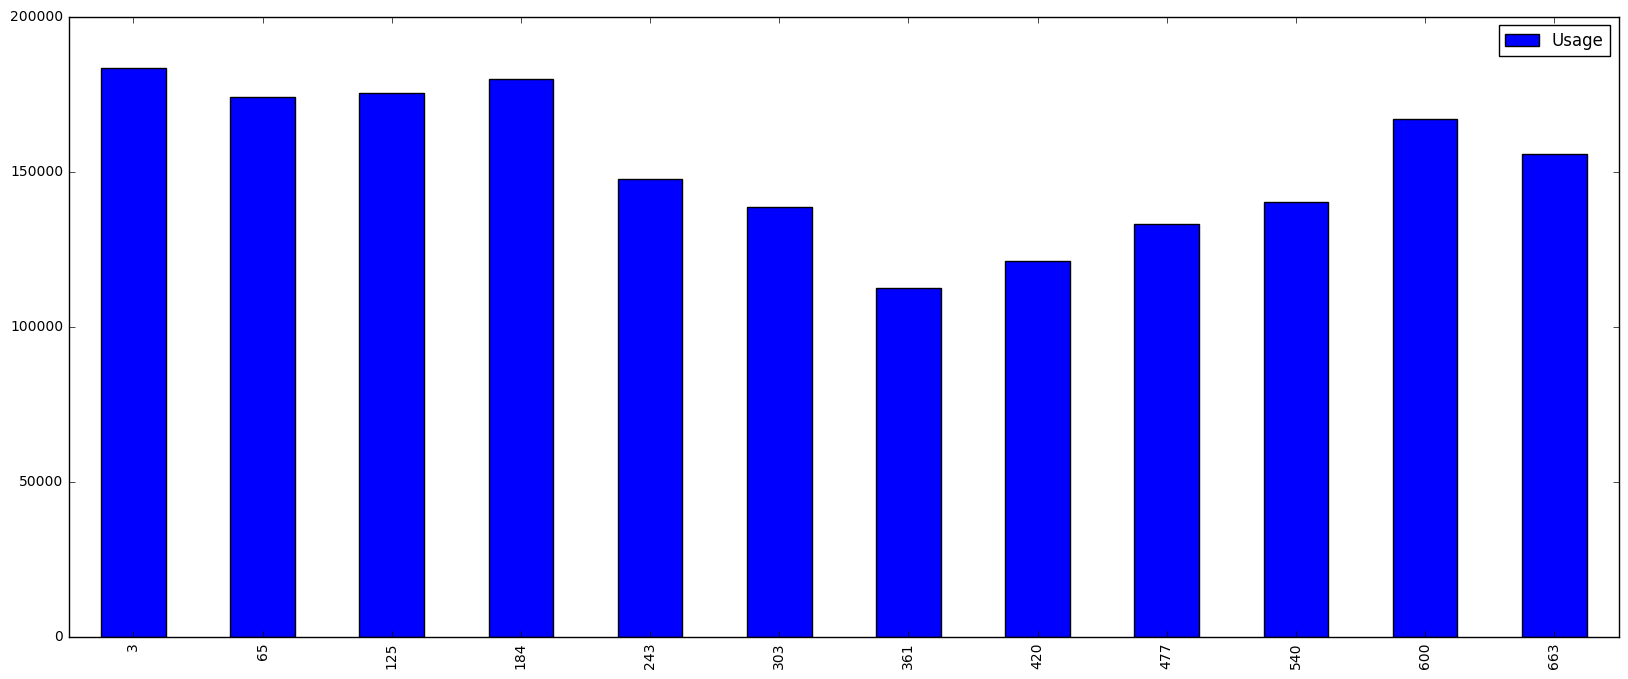

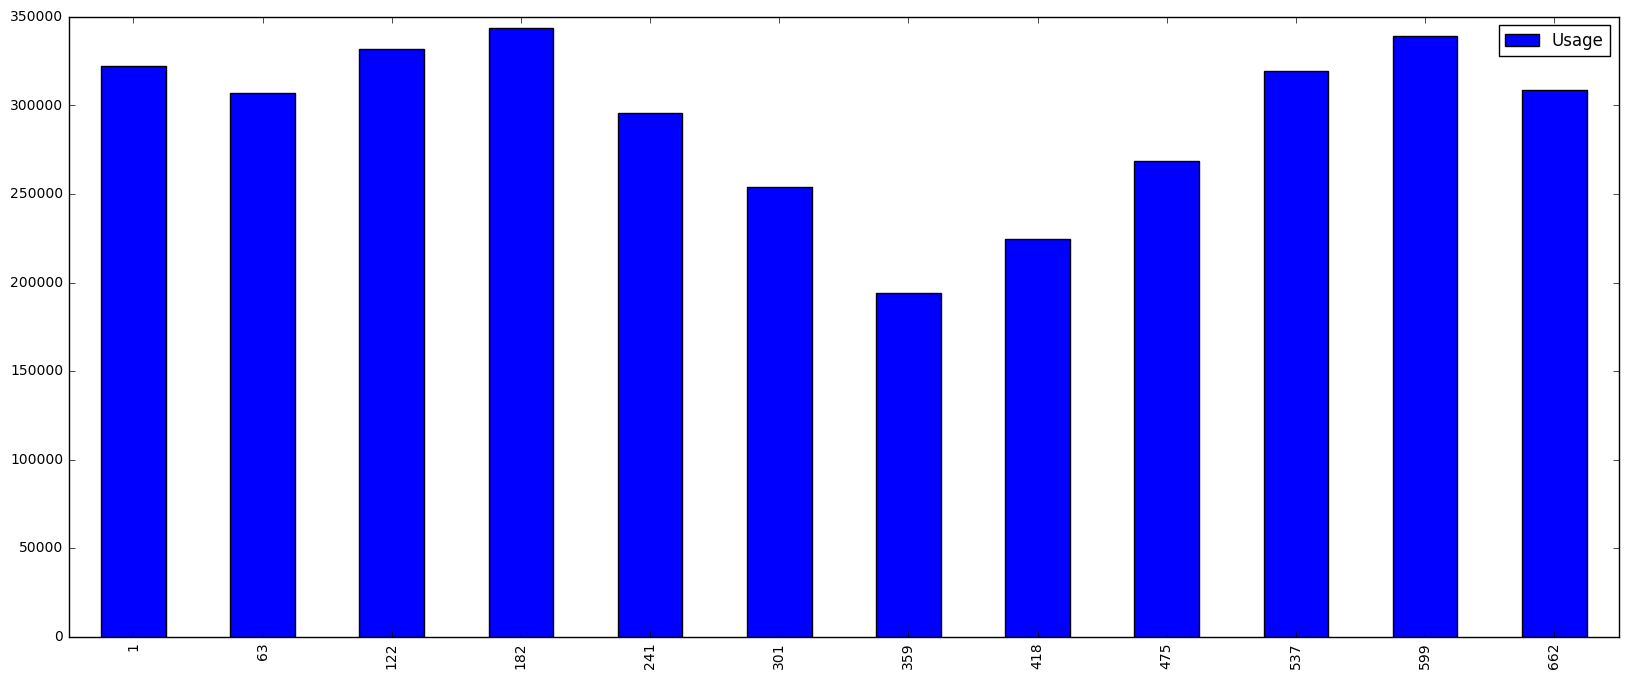

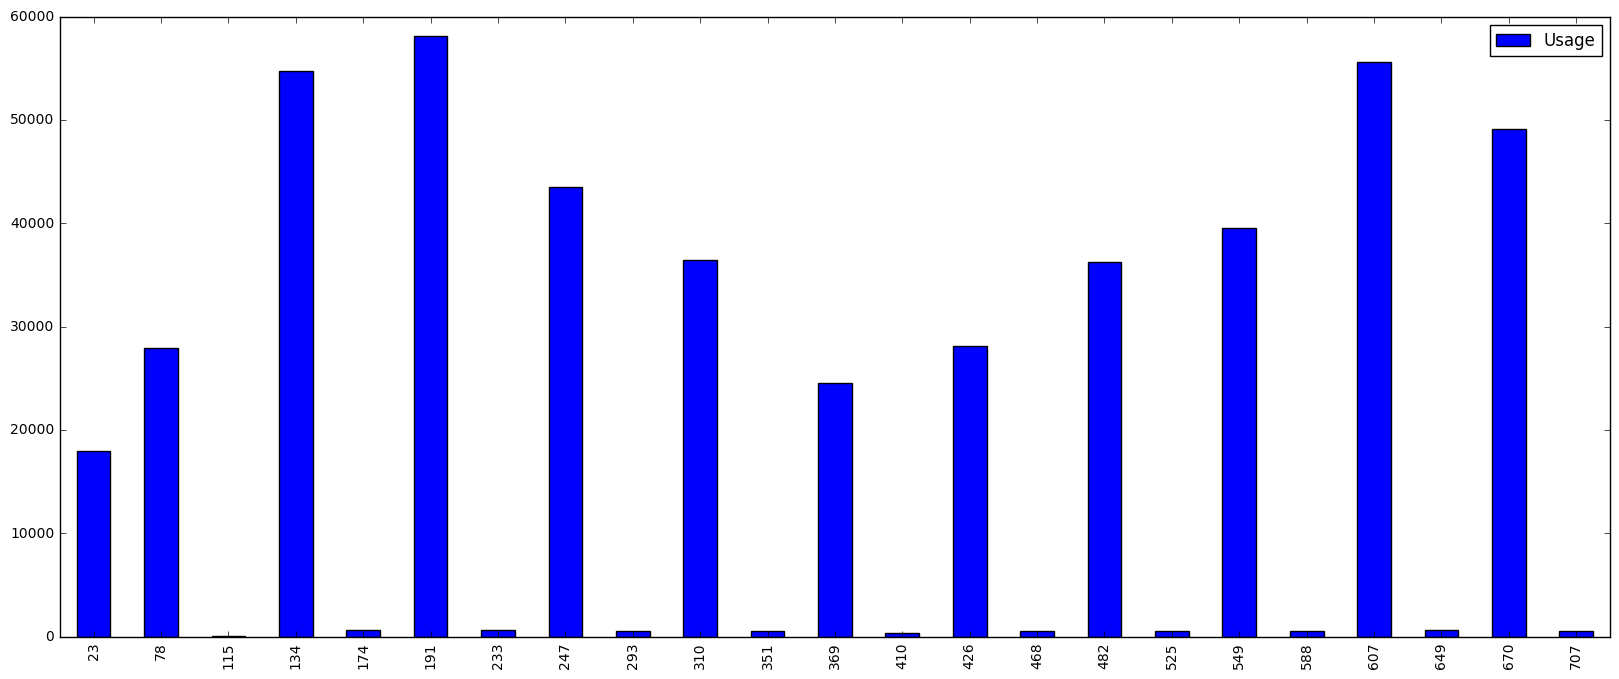

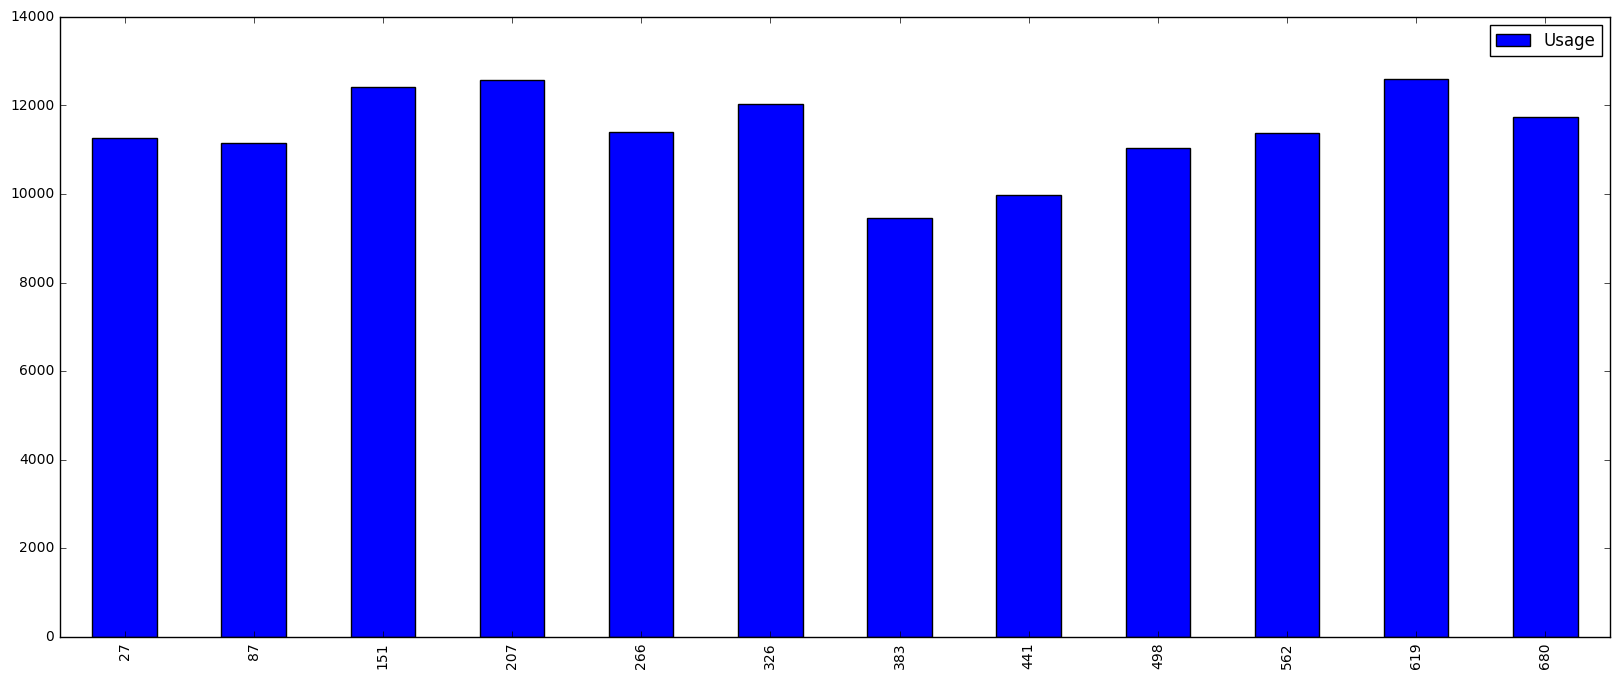

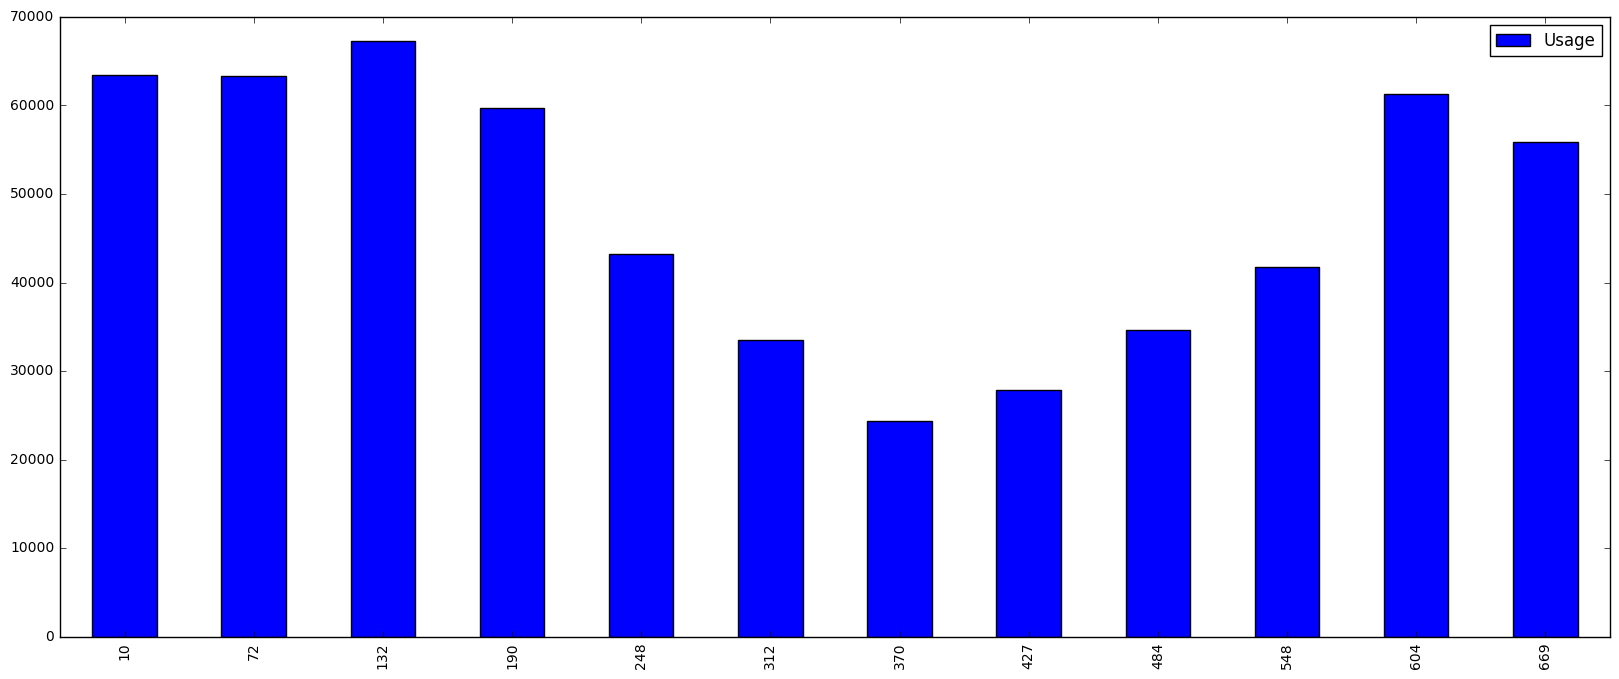

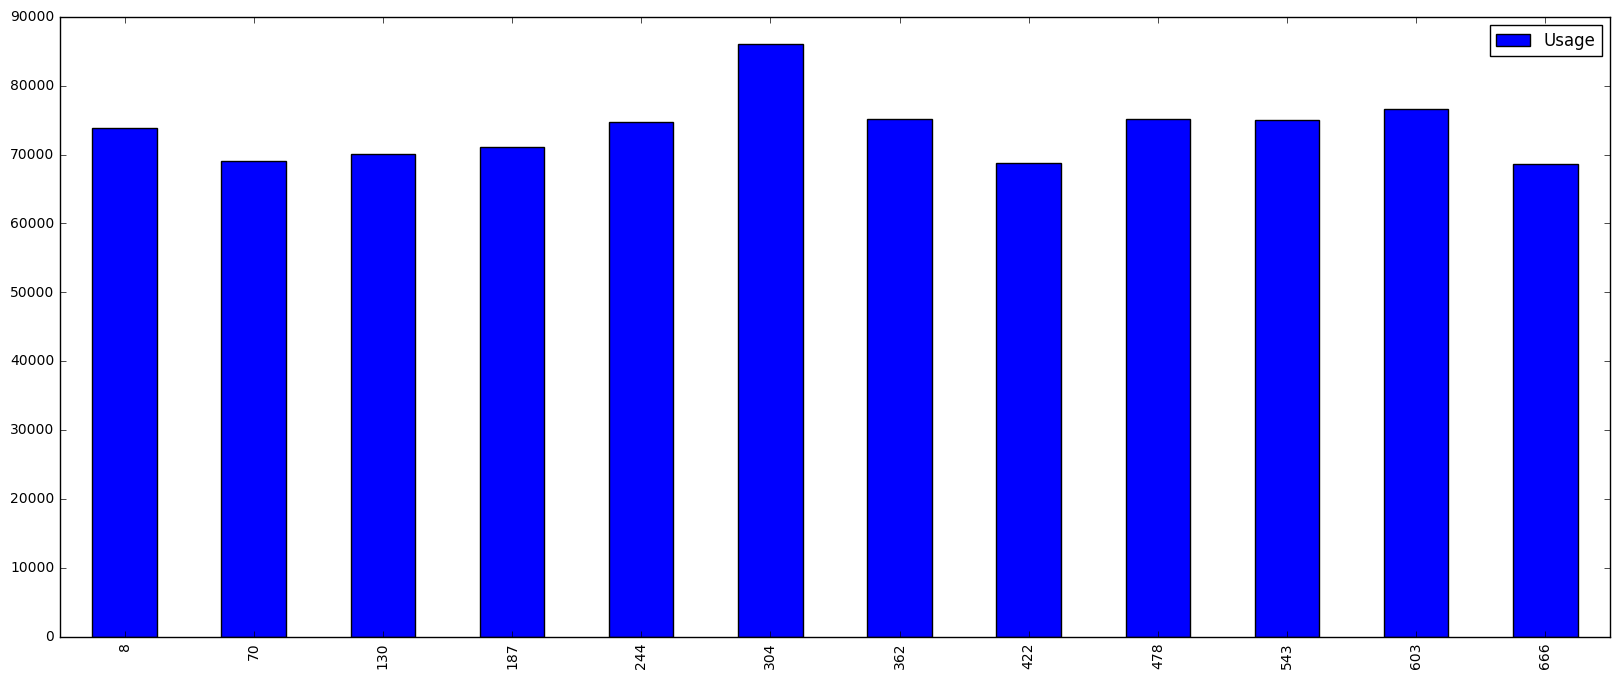

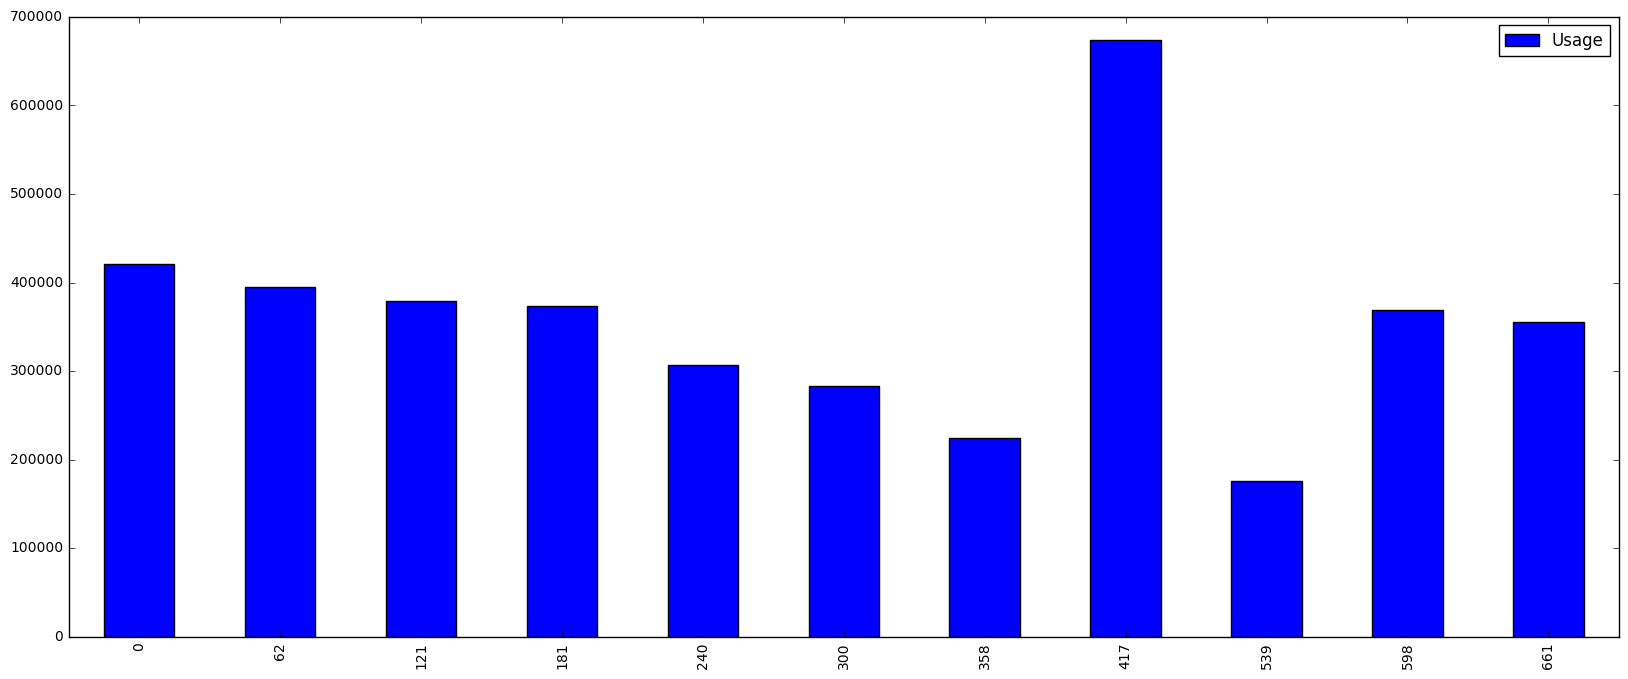

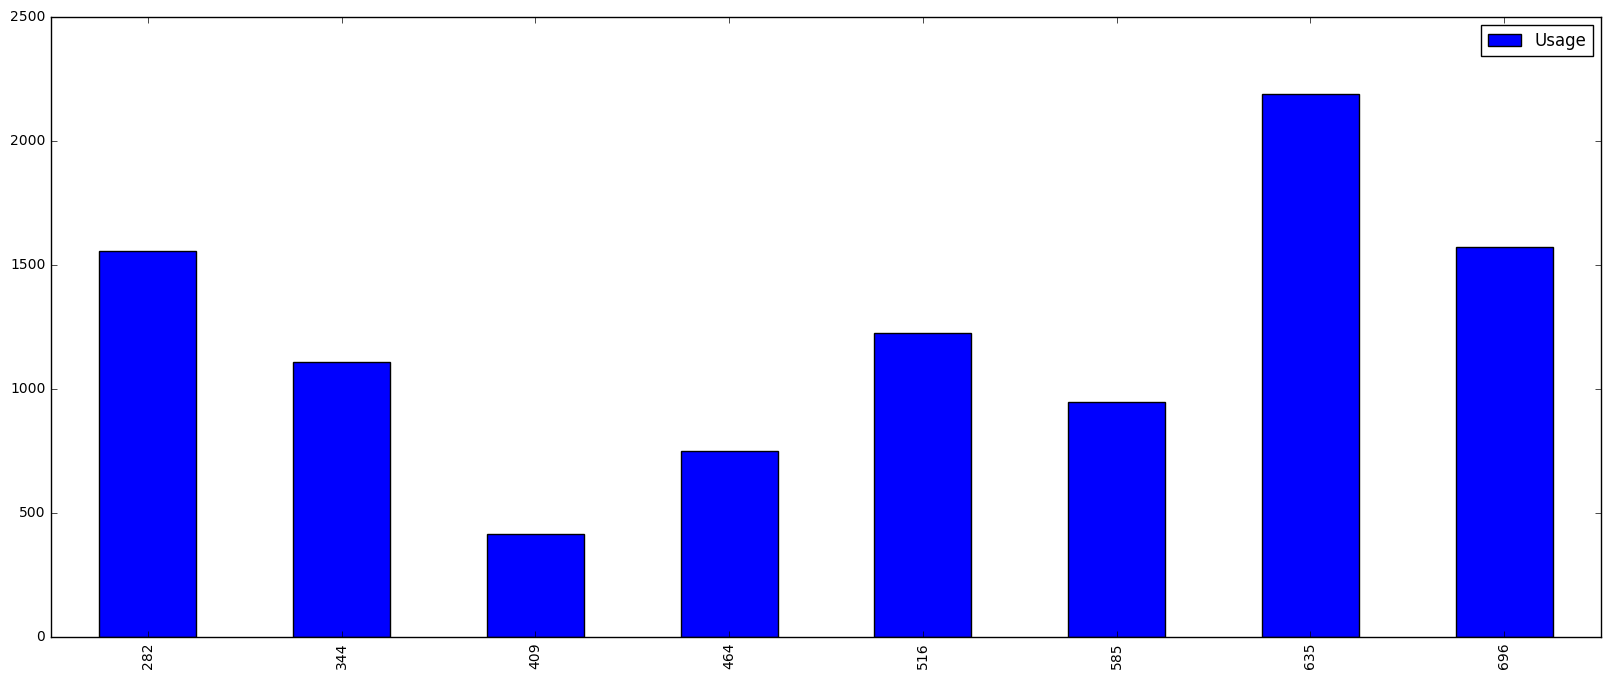

In [328]:
#df3.groupby('Usage').Usage.plot.bar(subplots=True)
#print (df3.groupby('bd_name')['Usage'].plot(subplots=True))
#df3.groupby('date').plot.bar()


In [281]:
df3.head()

,date,area,bd_name,loop,"types,",Usage
0,2017/08,North,Tien_gia_bin,主迴路,Teach,421187.8
1,2017/08,North,SC,主迴路,Teach,322267.0
2,2017/08,North,EECS,主迴路,Teach,305416.0
3,2017/08,North,SB,主迴路,Teach,183416.0
4,2017/08,North,DinningHall2,主迴路,Rented,113984.0


In [282]:
df3.Usage.mean()

102791.58822485206

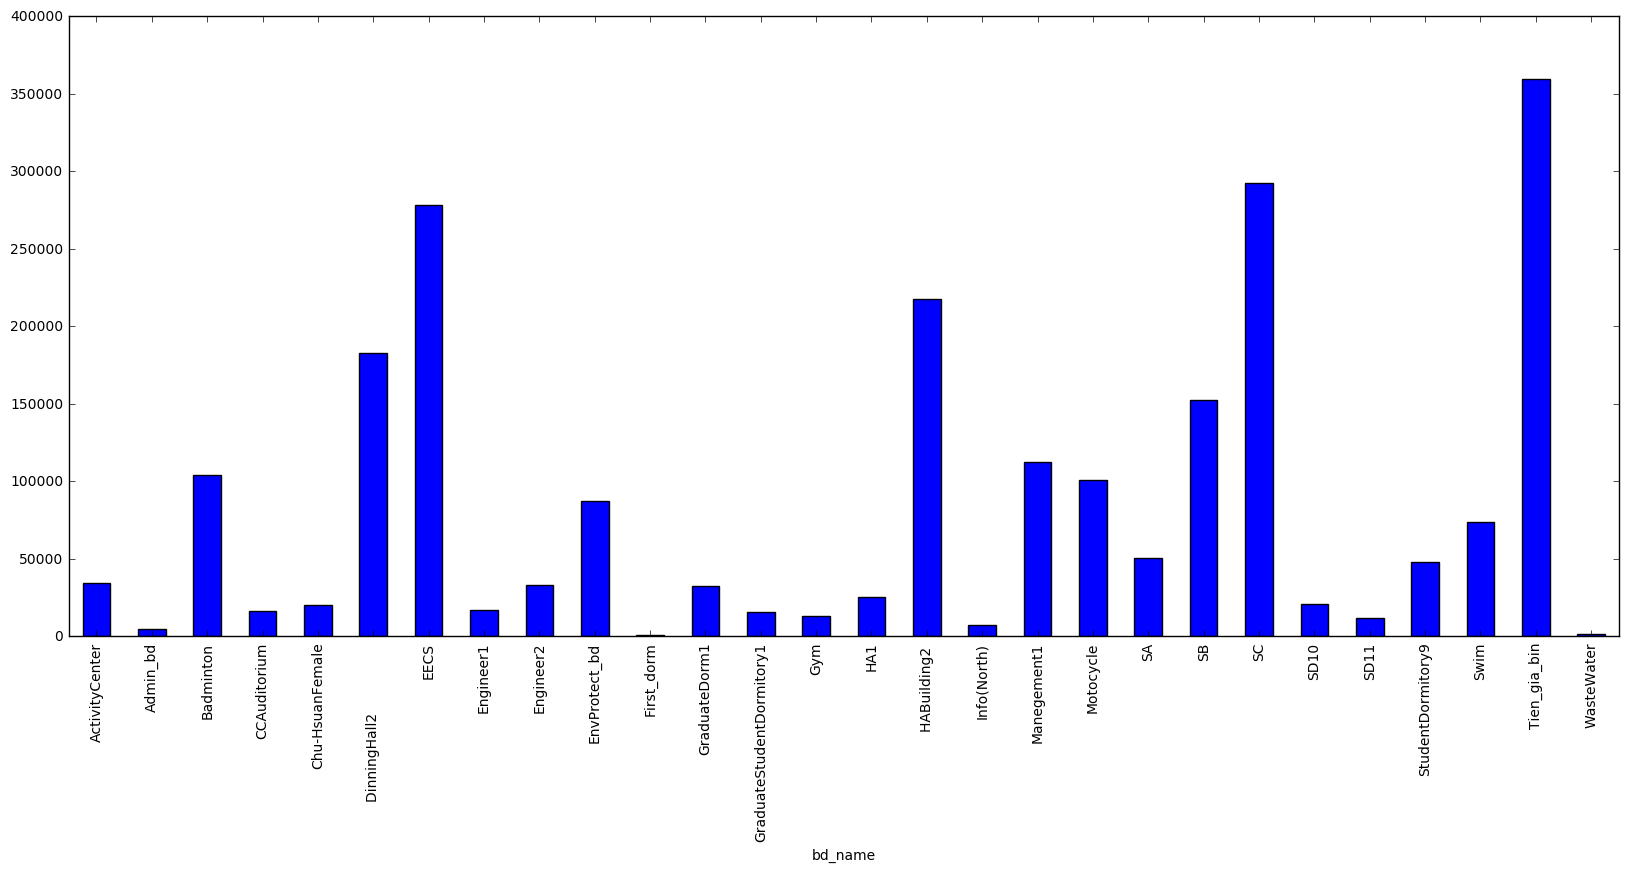

In [283]:
df3.groupby('bd_name').Usage.mean().plot.bar()

In [284]:
name ="""1. Management Building 1 管理一館
2. HA Building 2 人社二館
3. Administration Building 行政大樓
4. Chung Cheng Auditorium 中正堂
5. HA Building 1 人社一館
6. Engineering Building 1 工程一館
7. Engineering Building 2 工程二館
8. Science Building 1 科學一館
9. Information Building 資訊館
10. Engineering Building 3 工程三館
11. Dinning Hall 1 第一餐廳
12. Dinning Hall 2 第二餐廳
13. Badminton Building 羽球館
14. Gymnasium 體育館
15. Swimming Pool 游泳池
16. Field 田徑場
17. Student Dormitory 7 學生七舍
18. Student Dormitory 8 學生八舍
19. Chu-Hsuan Female 竹軒女舍
20. Student Dormitory 9 學生九舍
21. Student Dormitory 10 學生十舍
22. Graduate Student Dormitory 1 研一舍
23. Student Dormitory 11 學生十一舍
24. Engineering Building 4 工程四館
25. Management Building 2 管理二館
26. National Nano Device Lab 毫微米元件實驗室
27. Student Dormitory 12 學生十二舍
28. Science Building 2 科學二館
29. Student Activity Center 學生活動中心
30. Engineering Building 5 工程五館
31. Assembly Building 1 綜合一館
32. Student Dormitory 13 學生十三舍
33. Graduate Student Dormitory 2 研二舍
34. Library and Information Center 浩然圖書資訊中心
35. Microelectronics & Information 電子資訊中心
36. Civil Engineering Lab 土木實驗結構室
37. Female Student Dormitory 2 女二舍
38. Materials & Mechanical Engineering Lab材料實驗室
"""

In [285]:
name_list = name.splitlines()
for i in range(len(name_list)):
    name_list[i] = name_list[i].split()

name_list


bd_name_list = df3.bd_name.unique()
for i in range(len(name_list)):
    name_list[i] = [name_list[i][-1],''.join(name_list[i][1:-1])]


In [286]:
# Clear white space in string 
for i in range(len(bd_name_list)):
    bd_name_list[i] = bd_name_list[i].replace(" ", "")
bd_name_list 

array(['Tien_gia_bin', 'SC', 'EECS', 'SB', 'DinningHall2',
       'ActivityCenter', 'EnvProtect_bd', 'Swim', 'SA',
       'StudentDormitory9', 'GraduateDorm1', 'CCAuditorium', 'Engineer2',
       'Gym', 'HA1', 'Manegement1', 'HABuilding2', 'Engineer1',
       'Motocycle', 'SD10', 'GraduateStudentDormitory1', 'SD11',
       'Chu-HsuanFemale', 'Info(North)', 'First_dorm', 'Admin_bd',
       'Badminton', 'WasteWater'], dtype=object)

In [287]:
name_list_ch = []
for i in range(len(name_list)): 
    name_list_ch.append(name_list[i][0])
print(name_list_ch)
print(bd_name_list)

['管理一館', '人社二館', '行政大樓', '中正堂', '人社一館', '工程一館', '工程二館', '科學一館', '資訊館', '工程三館', '第一餐廳', '第二餐廳', '羽球館', '體育館', '游泳池', '田徑場', '學生七舍', '學生八舍', '竹軒女舍', '學生九舍', '學生十舍', '研一舍', '學生十一舍', '工程四館', '管理二館', '毫微米元件實驗室', '學生十二舍', '科學二館', '學生活動中心', '工程五館', '綜合一館', '學生十三舍', '研二舍', '浩然圖書資訊中心', '電子資訊中心', '土木實驗結構室', '女二舍', 'Lab材料實驗室']
['Tien_gia_bin' 'SC' 'EECS' 'SB' 'DinningHall2' 'ActivityCenter'
 'EnvProtect_bd' 'Swim' 'SA' 'StudentDormitory9' 'GraduateDorm1'
 'CCAuditorium' 'Engineer2' 'Gym' 'HA1' 'Manegement1' 'HABuilding2'
 'Engineer1' 'Motocycle' 'SD10' 'GraduateStudentDormitory1' 'SD11'
 'Chu-HsuanFemale' 'Info(North)' 'First_dorm' 'Admin_bd' 'Badminton'
 'WasteWater']


In [288]:
print (set(bd_name_list)&set(name_list_ch)) 
print (set(bd_name_list)-set(name_list_ch)) 
print (set(name_list_ch)-set(bd_name_list)) 


set()
{'SD10', 'WasteWater', 'SB', 'Gym', 'HA1', 'GraduateStudentDormitory1', 'SD11', 'Badminton', 'Manegement1', 'Info(North)', 'Tien_gia_bin', 'Engineer1', 'ActivityCenter', 'Swim', 'EECS', 'HABuilding2', 'GraduateDorm1', 'CCAuditorium', 'Motocycle', 'EnvProtect_bd', 'First_dorm', 'DinningHall2', 'Admin_bd', 'SC', 'Engineer2', 'Chu-HsuanFemale', 'SA', 'StudentDormitory9'}
{'研一舍', '科學一館', '學生十二舍', '電子資訊中心', '學生十一舍', '女二舍', '學生十舍', '學生八舍', '工程三館', '研二舍', '工程二館', '田徑場', '工程五館', '管理二館', '學生十三舍', '竹軒女舍', '管理一館', '人社二館', '浩然圖書資訊中心', '土木實驗結構室', '第一餐廳', '毫微米元件實驗室', 'Lab材料實驗室', '工程一館', '人社一館', '學生活動中心', '工程四館', '中正堂', '學生七舍', '行政大樓', '游泳池', '科學二館', '綜合一館', '體育館', '資訊館', '羽球館', '第二餐廳', '學生九舍'}


In [289]:
for item in name_list:
    print (item[1:-1])

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [290]:
df_hr = newdf.Date_Time.str[-5:-3]
df_min = newdf.Date_Time.str[-2:]
# print (df_hr.head(),df_min.head())
newdf.loc[:,'hr'] = pd.Series(df_hr)
newdf.loc[:,'min'] = pd.Series(df_min)
newdf.Date_Time = newdf.Date_Time.str[:-6]
newdf.head()

AttributeError: 'DataFrame' object has no attribute 'Date_Time'

In [ ]:
#科三每小時平均用電量, 範圍 10.01(Sun) - 10.14(Sat.)
dfnew_gpby = newdf.groupby(['hr'])
dfnew_gpby.mean().plot.bar()
matplotlib.pyplot.title('Hourly average electricity usage (Takes 14 day, unit: degree)')

In [ ]:
#科三每15分鐘用電量 
#沒什麼意義
dfnew_gpby = newdf.groupby(['min'])
dfnew_gpby.mean().plot.bar()
# matplotlib.pyplot.title('Minute average electricity usage (Takes 14 day, unit: degree)')

In [ ]:
dfnew_byDay = newdf.groupby(['Date_Time'])
dfnew_byDay.plot.bar(stacked=True)

In [ ]:
df_te.plot.bar()
matplotlib.pyplot.title('Electricity usage in hours (Takes 14 day, unit: degree)')

In [ ]:
plt.bar( 
        #using df['pre_score'] data,
        dfnew_byDay.Usage, 
        # of width
#         width, 
        # with alpha 0.5
#         alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
#         label=dfnew_byDay['Date_Time'][0]
) 

In [ ]:
?plt.bar

In [ ]:
''